<div class="alert alert-block alert-info">   

# YVR Energy Usage Project  
#### Author: Anusha Ramachandran

</div>

---

## Table of Contents
[Project description](#Description)  
[Part A: Time plot, trying transformations/adjustments, creating training and test set](#PartA)  
[Part B](#PartB)  
[Introduction & Approach](#Introduction)  
[Exploratory Data Analysis](#EDA1)  
[Potential causes of patterns](#Causes)   
[Exponential Smoothing Model](#ETS)  
[ARIMA model](#ARIMA)  
[Comparison of models](#Compare)  
[Forecasts](#Forecast)  
[Discussion](#Discussion)  
[Explanatory model](#Explanatory)


[Appendix A: ETS Models](#AppendixA)  
[Appendix B: ARIMA Models](#AppendixB)

---

<div class="alert alert-block alert-info">   
<a id="Description"></a>

# Project description

**Objective**  

The main goal of this project is to develop a model to forecast monthly energy use for the Vancouver International Airport (YVR).  

<br>

**Introduction**  

Budget planning at YVR requires forecasting the cost of energy to operate the airport. An accurate forecast could help the YVR representatives negotiate more favourable contracts with energy suppliers.

<br>

**Data Available**  

Data was taken from 14 years of records from the YVR database. This data set includes information on date, energy use, temperature, terminal area, and number of passengers. Data have been aggregated by month into 168 records (14 years with 12 months each).  

<br>


| # | Variable | Definition |  
| :- | :- | :- |  
| 1 | month | Month and year, e.g.: Nov-98 |
| 2 | energy | Energy use measured in thousands of kilowatt hours (kWh) |
| 3 | mean.temp | Mean monthly temperature outside (degrees Celsius) |
| 4 | total.area | Total area of all terminals (sq. m.) |
| 5 | total.passengers | Total number of passengers in thousands |
| 6 | domestic.passengers | Total number of domestic passengers (traveling within Canada) in thousands |
| 7 | US.passengers | Total number of passengers traveling between Canada and the US in thousands |
| 8 | international.passengers | Total number of passengers traveling between YVR and countries other than Canada/US |


In this project, you will develop appropriate models, compare the models, and discuss advantages and limitations of each model. You should select the best model and use it to provide monthly forecasts for energy use for the next three years (January 2011 through December 2013).   
    </div>

---

<div class="alert alert-block alert-info">   

# Part A (3.5 marks)
## Time plot, trying transformations/adjustments, creating training and test set
### See Canvas submission called "Project: Part A" for detailed questions and points breakdown.
<a id="PartA"></a>  

</div>


### Import the data

In [1]:
library(fpp2)
library(seasonal)
options(repr.plot.width=15, repr.plot.height=8)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

-- Attaching packages -------------------------------------------------------------------------------------- fpp2 2.4 --

v ggplot2   3.4.0     v fma       2.4  
v forecast  8.20      v expsmooth 2.3  





In [2]:
#import_data
YVR_csv <- read.csv("Energy use at YVR.csv", header=TRUE)

#Data check
nrow(YVR_csv) #number of rows -> Month
ncol(YVR_csv) # number of columns -> qtty of Features
names(YVR_csv) # name of colums -> Features
str(YVR_csv) 
summary(YVR_csv)

[1] 168

[1] 8

[1] "month"                    "energy"                  
[3] "mean.temp"                "total.area"              
[5] "total.passengers"         "domestic.passengers"     
[7] "US.passengers"            "international.passengers"

'data.frame':	168 obs. of  8 variables:
 $ month                   : chr  "Jan-97" "Feb-97" "Mar-97" "Apr-97" ...
 $ energy                  : int  5958 5859 5230 5654 5618 5963 5920 6430 6053 5514 ...
 $ mean.temp               : num  3.9 5 6.3 9.1 14 15.6 17.7 19 15.9 10.4 ...
 $ total.area              : int  202966 202966 202966 202966 202966 202966 202966 202966 202966 202966 ...
 $ total.passengers        : num  1068 1040 1195 1086 1245 ...
 $ domestic.passengers     : num  574 570 633 599 674 ...
 $ US.passengers           : num  263 267 319 265 308 ...
 $ international.passengers: num  231 203 244 222 263 ...


    month               energy       mean.temp       total.area    
 Length:168         Min.   :4970   Min.   : 0.90   Min.   :202966  
 Class :character   1st Qu.:5958   1st Qu.: 5.85   1st Qu.:248046  
 Mode  :character   Median :6400   Median : 9.70   Median :248046  
                    Mean   :6538   Mean   :10.58   Mean   :257973  
                    3rd Qu.:7012   3rd Qu.:15.30   3rd Qu.:279940  
                    Max.   :8813   Max.   :19.70   Max.   :319585  
 total.passengers domestic.passengers US.passengers   international.passengers
 Min.   : 920.2   Min.   :507.1       Min.   :212.4   Min.   :189.0           
 1st Qu.:1172.1   1st Qu.:616.7       1st Qu.:292.0   1st Qu.:260.3           
 Median :1306.5   Median :692.5       Median :320.5   Median :300.1           
 Mean   :1333.1   Mean   :690.9       Mean   :337.6   Mean   :304.7           
 3rd Qu.:1439.1   3rd Qu.:747.2       3rd Qu.:366.7   3rd Qu.:348.0           
 Max.   :1892.9   Max.   :971.1       Max.   :514.

In [3]:
#convert to time series
YVR_data <- ts(YVR_csv[,-1], start=c(1997,01), frequency=12)
YVR_data

,energy,mean.temp,total.area,total.passengers,domestic.passengers,US.passengers,international.passengers
Jan 1997,5958,3.9,202966,1068.36,573.84,263.13,231.38
Feb 1997,5859,5.0,202966,1040.30,570.36,267.39,202.56
Mar 1997,5230,6.3,202966,1195.47,632.68,319.09,243.71
Apr 1997,5654,9.1,202966,1086.42,599.11,265.37,221.94
May 1997,5618,14.0,202966,1244.52,673.70,307.55,263.27
Jun 1997,5963,15.6,202966,1352.89,729.84,333.89,289.16
Jul 1997,5920,17.7,202966,1517.17,807.90,388.91,320.36
Aug 1997,6430,19.0,202966,1668.83,869.27,428.65,370.91
Sep 1997,6053,15.9,202966,1348.09,714.28,330.92,302.89
Oct 1997,5514,10.4,202966,1195.02,662.97,286.39,245.66


In [4]:
YVR_energy <- YVR_data[,1]
YVR_energy

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
1997,5958,5859,5230,5654,5618,5963,5920,6430,6053,5514,5633,5545
1998,5825,5617,4970,5331,5233,5557,5841,6489,6138,5539,5667,5730
1999,6030,5954,5326,5672,5301,5777,5831,6345,6309,6068,6372,6302
2000,6570,6497,6106,6330,6070,6401,6697,7003,6760,6192,6334,6371
2001,6501,6435,5674,6206,6094,6544,6602,6886,6677,6133,6088,6291
2002,6349,6286,5588,5914,5716,6235,6483,6708,6553,5837,5961,5828
2003,6126,6020,5375,5741,5635,6199,6376,6844,6379,5822,5884,5820
2004,6105,6014,5552,5908,5956,6399,6572,7043,6418,5741,6497,6207
2005,6504,6337,5644,6148,6141,6521,6661,7387,6815,6173,6319,6434
2006,6544,6534,5809,6290,6202,6492,6733,7040,6690,6220,6497,6582


### Time plot

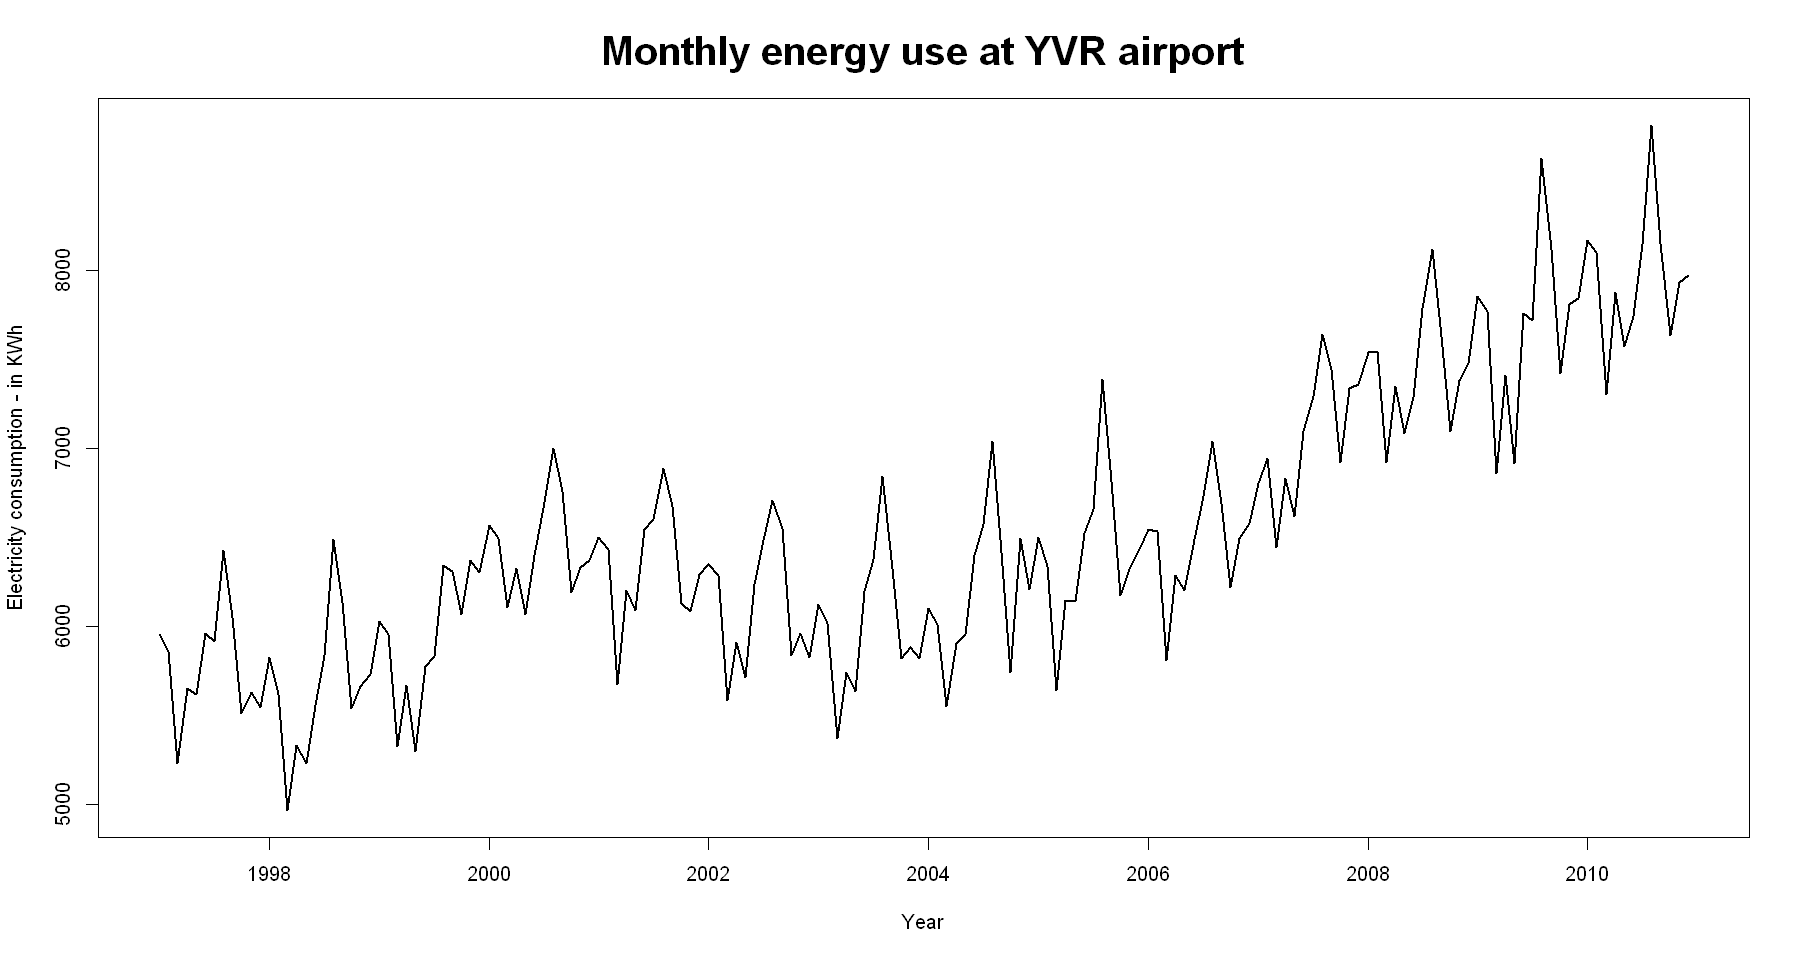

In [5]:
plot(YVR_energy
    ,main =  "Monthly energy use at YVR airport"
    ,xlab="Year"
    ,ylab="Electricity consumption - in KWh"
    ,lwd = 2
    ,cex.main=2)

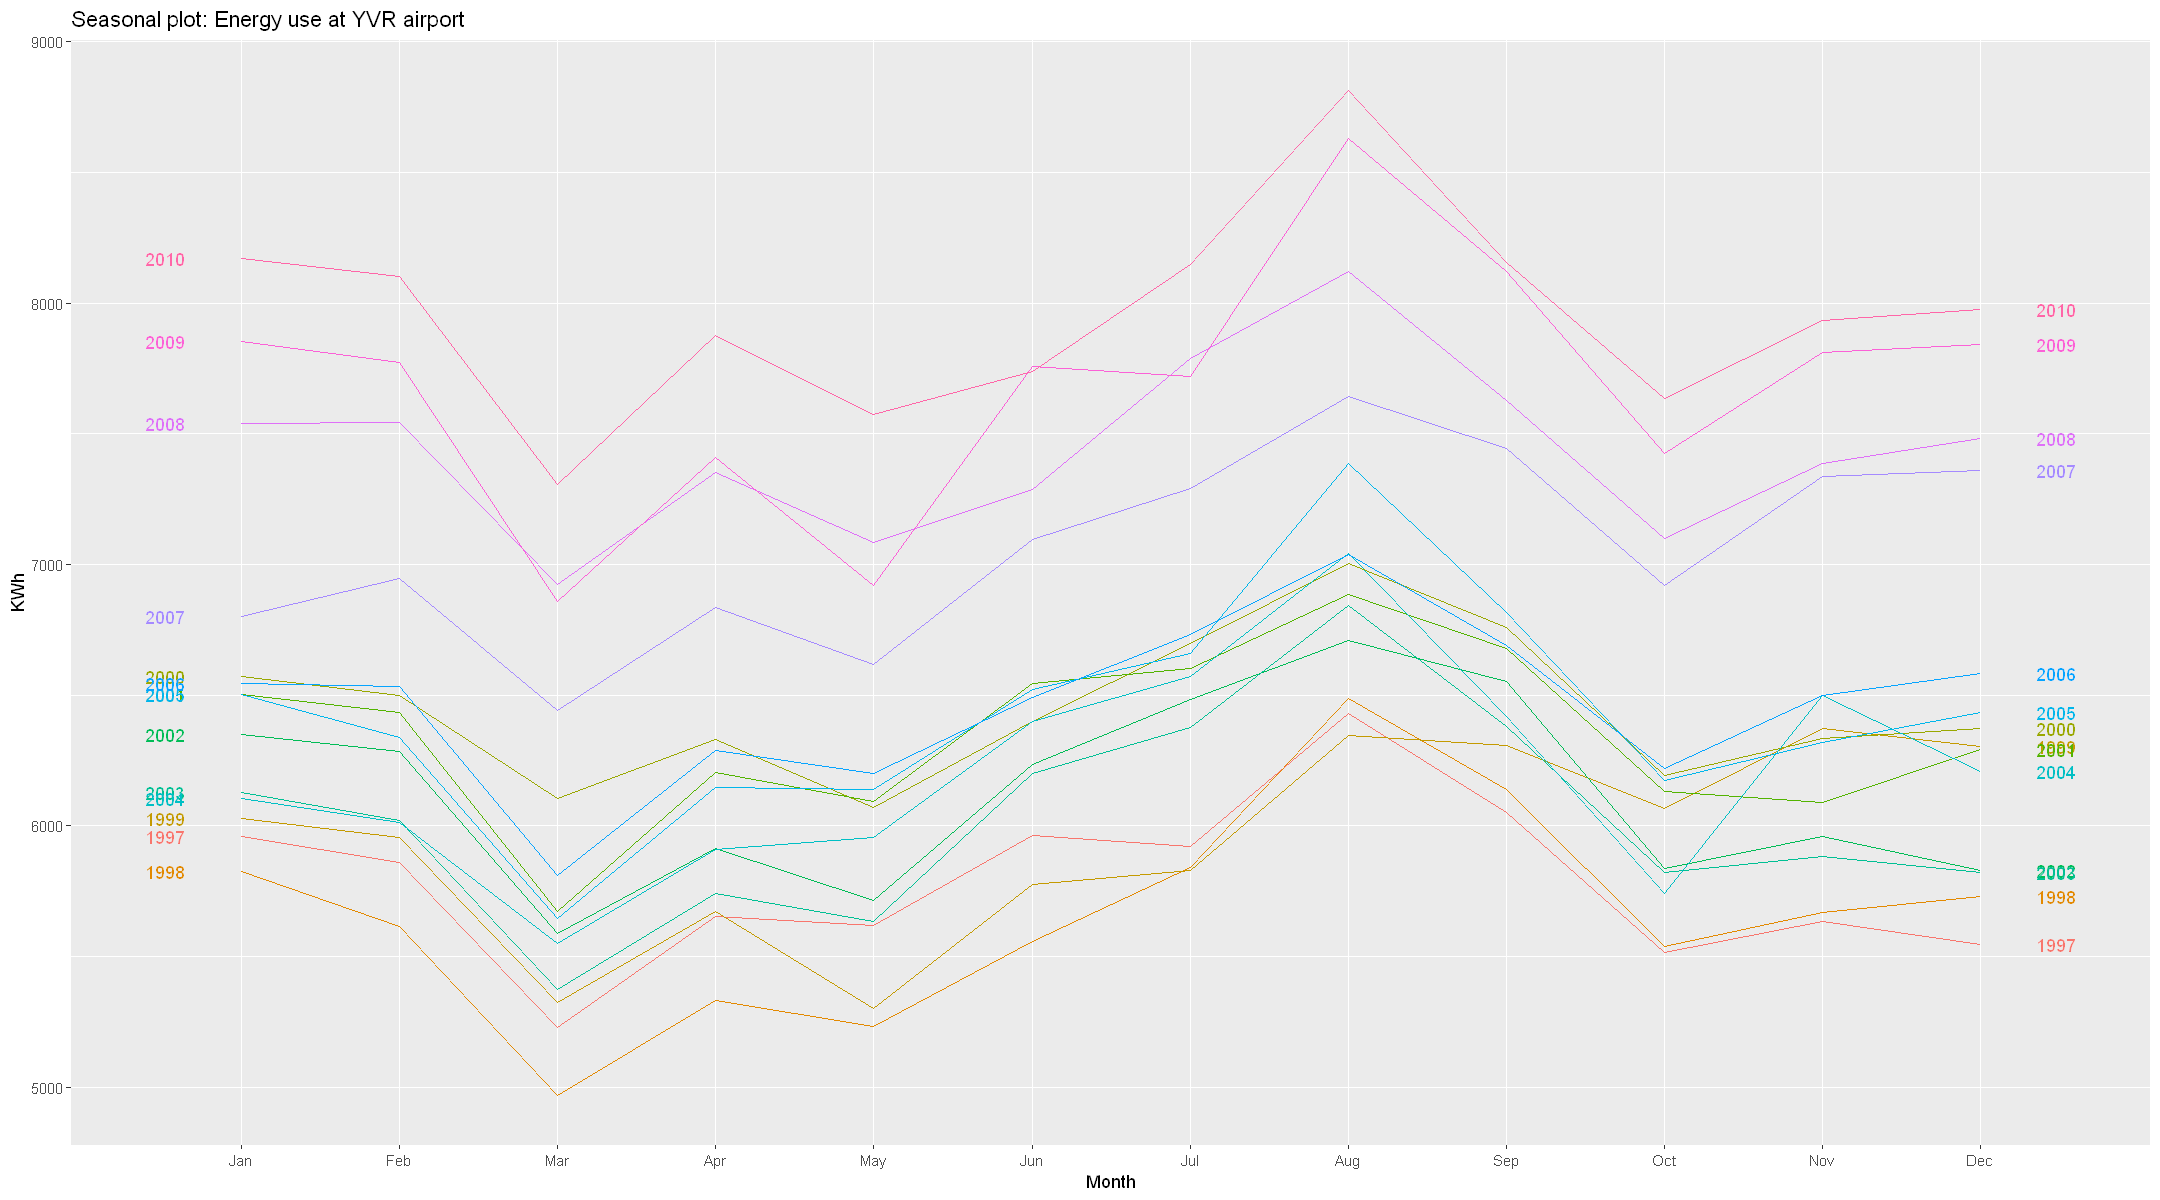

In [55]:
ggseasonplot(YVR_energy, year.labels=TRUE, year.labels.left=TRUE) +
      ggtitle("Seasonal plot: Energy use at YVR airport") +
      ylab("KWh")


### Box-Cox transformation

[1] "Best lambda =  0.69315"


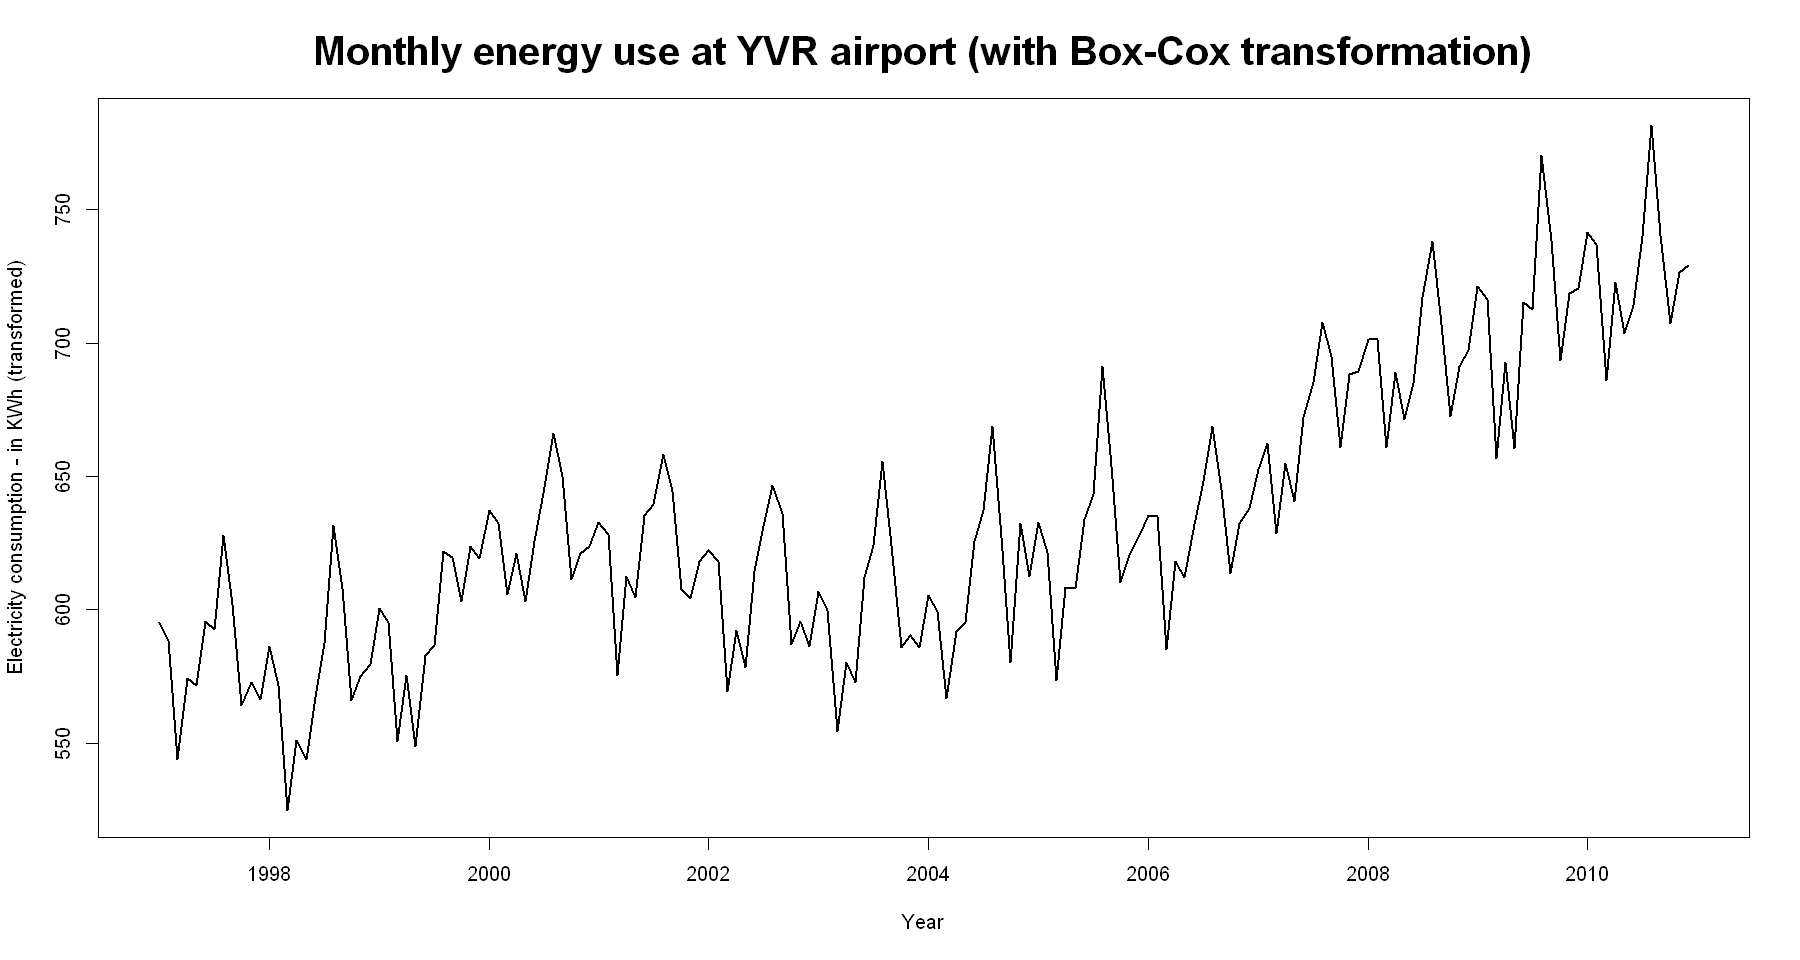

In [7]:
# Write the code to do a Box-Cox transformation of the electricity use data 
#(this will be submitted as part of the last question for Part A of the project)

lambda_best <- BoxCox.lambda(YVR_energy) # here we are allowing R to select the "best" value for lambda to make variance equal
print(paste("Best lambda = ",round(lambda_best,5)))

plot(BoxCox(YVR_energy,lambda_best)
    ,main =  "Monthly energy use at YVR airport (with Box-Cox transformation)"
    ,xlab="Year"
    ,ylab="Electricity consumption - in KWh (transformed)"
    ,lwd = 2
    ,cex.main=2)

The objective of a Box-Cox transformation is to make the seasonal variation approximately equal across the whole series. By comparing the two plots (energy consumption - original data and box-cox transformed) we see the transformation was not particularly effective in this case. One reason might be that there is no particular pattern to the seasonal variation (there are periods when variation increases and then decreases).


### Calendar adjustment for number of days in each month

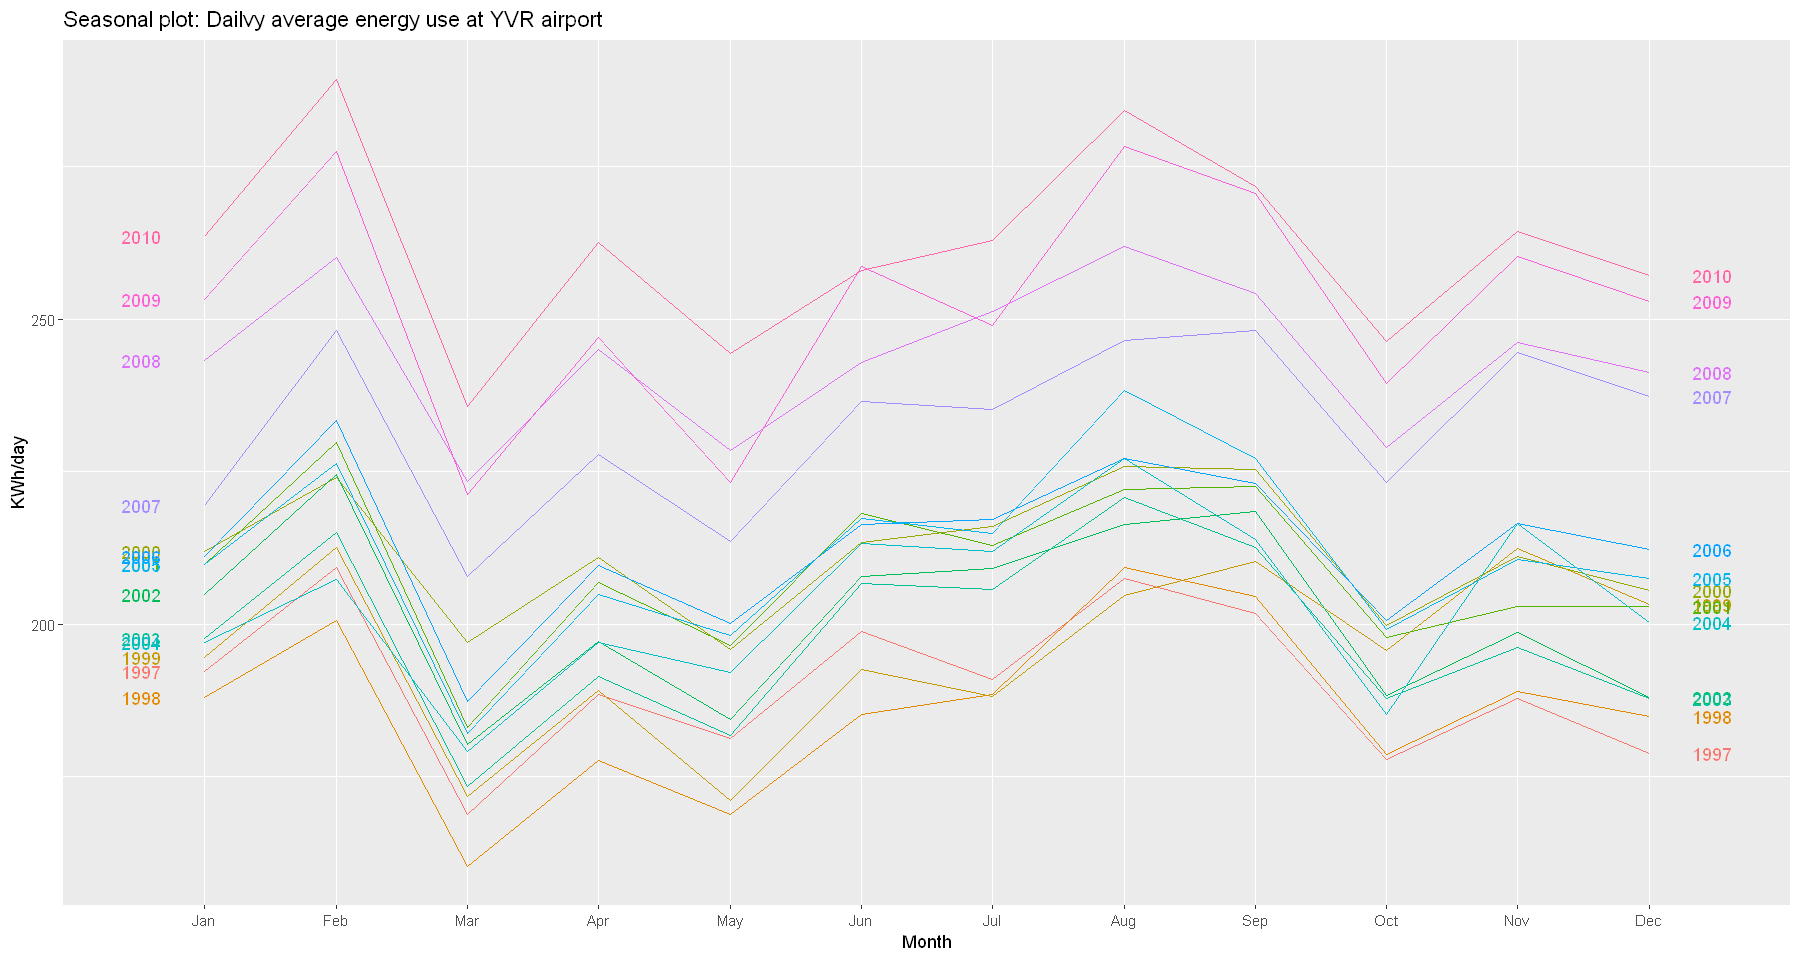

In [8]:
YVR_data_daily <- YVR_data/monthdays(YVR_data)

ggseasonplot(YVR_data_daily[,1], year.labels=TRUE, year.labels.left=TRUE) +
      ggtitle("Seasonal plot: Dailvy average energy use at YVR airport") +
      ylab("KWh/day")

Calendar adjustments aim to reduce variations in the data due to the number of days or weekdays in a given period. We see a change in the peak month, from August to February, considering the lower number of days (28 x 31).

### Other Calendar adjustments

Calendar adjustments aim to reduce variations in the data due to the number of days or weekdays in a given period.  Other calendar effects that we may consider here are:

1) Holidays - we can expect an increase in the number of flights during holidays (like Lunar New Year, Easter and national celebrations)

2) Number of weekdays or weekends - weekdays have more business-related travels, while we can expect more vacation/personal-related customers on weekends. Different types of customers have other behaviours and can incur different demands in the end (like arrival time and services demand at the airport)

### Divide the data into the training set and the test set

In [9]:
YVR_data.training <- window(YVR_data, end=c(2007,12));
YVR_data.test <- window(YVR_data, start=c(2008,01)); YVR_data.test # last 3 years (20%)

,energy,mean.temp,total.area,total.passengers,domestic.passengers,US.passengers,international.passengers
Jan 2008,7540,2.8,298061,1420.78,710.86,351.98,357.94
Feb 2008,7543,5.5,298061,1361.18,710.01,344.62,306.55
Mar 2008,6923,5.9,298061,1527.59,774.64,393.55,359.40
Apr 2008,7351,7.6,298061,1401.73,737.40,336.73,327.61
May 2008,7084,12.8,298061,1544.03,819.20,373.69,351.14
Jun 2008,7288,14.4,298061,1641.89,849.45,405.28,387.17
Jul 2008,7788,17.8,302279,1798.42,902.69,465.21,430.52
Aug 2008,8120,17.8,302279,1892.90,971.06,484.17,437.67
Sep 2008,7628,14.6,302279,1440.72,768.00,321.68,351.04
Oct 2008,7099,10.0,302279,1327.44,757.37,279.68,290.40


In [10]:
YVR_energy.training <- window(YVR_energy, end=c(2007,12)); 
YVR_energy.test <- window(YVR_energy, start=c(2008,01)); YVR_energy.test # last 3 years (20%)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
2008,7540,7543,6923,7351,7084,7288,7788,8120,7628,7099,7385,7481
2009,7852,7773,6859,7410,6918,7759,7718,8630,8121,7423,7809,7841
2010,8171,8101,7306,7877,7575,7740,8149,8813,8154,7635,7932,7975


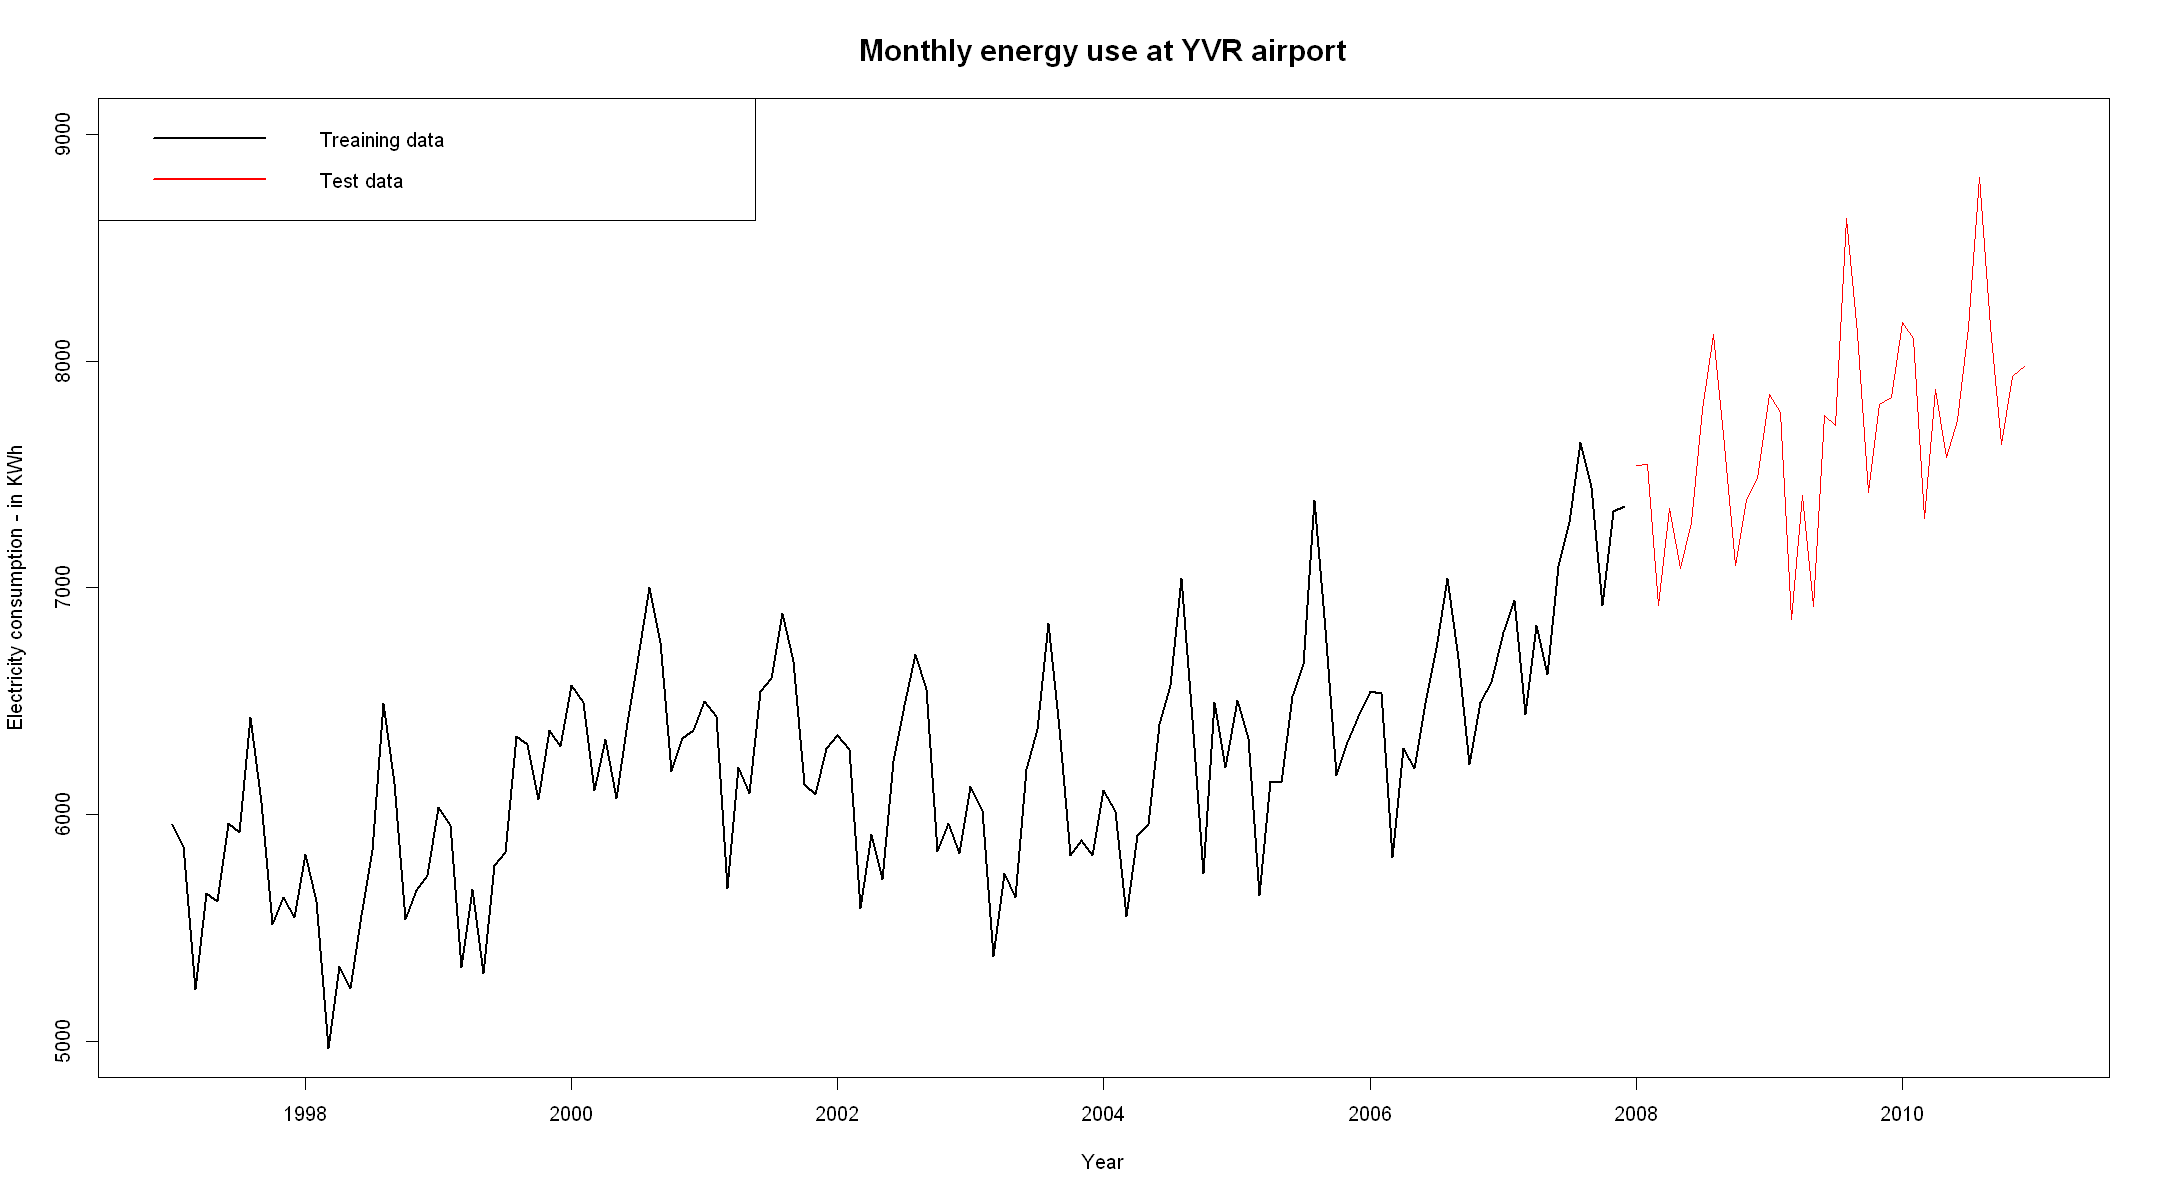

In [58]:
plot(YVR_data.training[,1]
    ,main =  "Monthly energy use at YVR airport"
    ,xlab="Year"
    ,ylab="Electricity consumption - in KWh"
    ,lwd = 2
    ,cex.main=1.5
    ,xlim=c(1997,2011)
    ,ylim=c(5000,9000))

lines(YVR_data.test[,1], col="red")

legend("topleft"
       ,lty=1
       ,lwd=2
       ,col=c(1,"red")
       ,legend=c('Treaining data', "Test data" ))

----

<div class="alert alert-block alert-info">   

# Part B
### Note that Part B includes everything below this header
<a id="PartB"></a>  

</div>

<div class="alert alert-block alert-danger">
    
### Make sure that your code is organized and includes useful annotations and written descriptions of what you are seeing on plots or the conclusions that you are drawing. (0.5 marks)
  
### Prepare all plots for publication by including detailed axis labels.
    
### Complete anwers will include observations and conclusions/interpretations.
<div>

<div class="alert alert-block alert-success">
<a id="Introduction"></a>  

# Introduction & Approach (250 words max.) (2 marks)
Write an introduction to the project and explain the overall approach.  

What to include: objective and purpose of the analysis, background information, brief description of the approach that is being taken in the analysis. If you include any references, please put the bibliographical information at the end of your introduction; this does not contribute to the word count. **Make sure to write in your own words.**  

</div>

   As our final project for the Forecasting and Time Series Prediction course, the Vancouver International Airport (YVR) requested the development of a tool to support budgeting activities. More specifically, YVR wants a tool to estimate future demand for energy/electricity to operate the airport, since an accurate forecast can help the procurement team negotiate more favourable contracts with suppliers.
Our model will focus on estimating energy consumption (in kilowatt-hours - kWh), which later can be used to estimate the total cost of energy by applying the expected unit cost of energy ($ per kWh)
We will build these models with the following steps: 
-	Exploratory data analysis to understand trend-cycle, seasonality, and other unusual patterns.
-	Application of basic forecasting methods such as mean, drift, naïve and seasonal naïve.
-	Development of an exponential smoothing model (ETS).
-	Development of an autoregressive integrative model (ARIMA).
-	Model comparison and selection
-	Energy consumption forecast for the next 3 years





----

<div class="alert alert-block alert-warning">
<a id="EDA1"></a>

# Exploratory Data Analysis (300 words max.) (4 marks)  

Create plots of the electricity use data (**use all the data, not just the training set**); prepare them as if for publication and upload them. Include a decomposition plot from STL decomposition.  

Describe the characteristics of trend, cycle and seasonality in detail, referring to specific characteristics of the plots. Also mention any unusual features, if present. Be specific.  

<br>

Organize your answers as follows:  

Seasonality: ...  
    
Trend/cycle: ...  

Unusual features: ...  
</div>

#### Create plots of the electricity use data (use all the data, not just the training set)

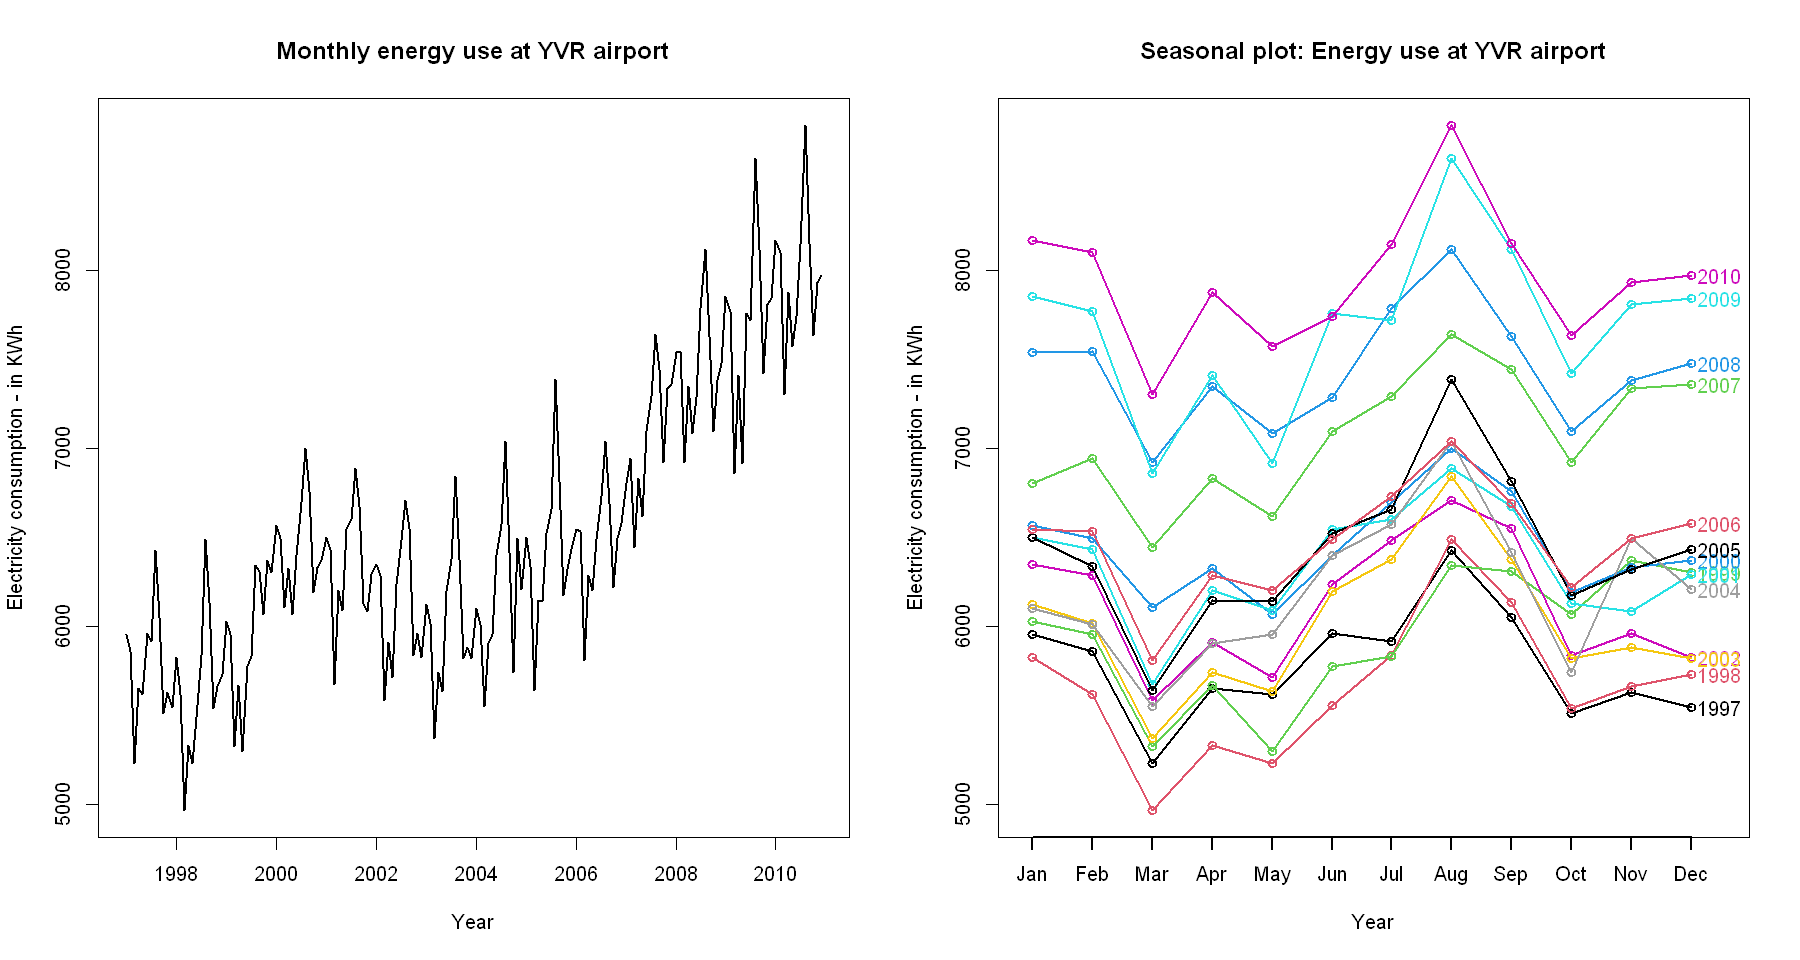

In [12]:
par(mfrow=c(1,2))

plot(YVR_energy
    ,main = "Monthly energy use at YVR airport"
    ,xlab="Year"
    ,ylab="Electricity consumption - in KWh"
    ,lwd = 2)

colors <- seq(1,14, by=1)
seasonplot(YVR_energy
    ,year.labels=TRUE
    ,main =  "Seasonal plot: Energy use at YVR airport"
    ,xlab="Year"
    ,ylab="Electricity consumption - in KWh"
    ,lwd = 2
    ,col = colors)

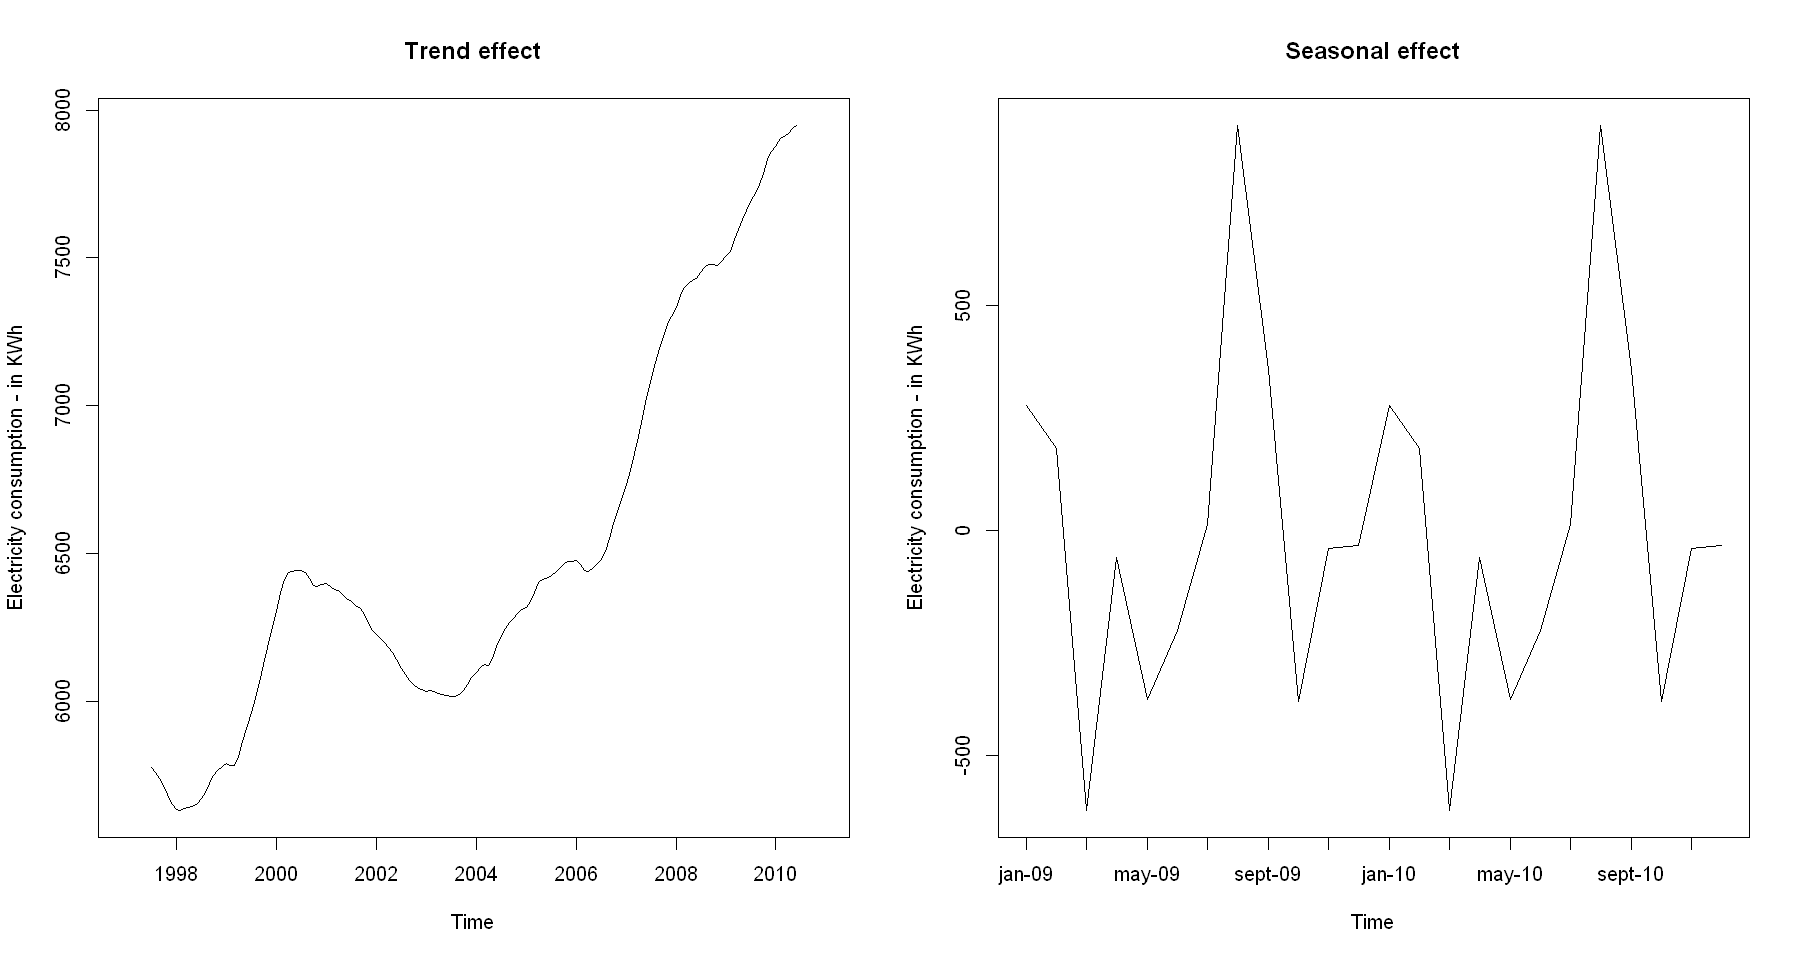

In [13]:
# Also including a additive decomposition plot to better see trend and seasonal effects
par(mfrow=c(1,2))

plot(decompose(YVR_energy, "additive")$trend
    ,main = "Trend effect"
    ,ylab="Electricity consumption - in KWh")
plot(decompose(window(YVR_energy,start=2009), "additive")$seasonal
     ,main = "Seasonal effect"
     ,ylab="Electricity consumption - in KWh"
     ,xaxt = "n")
# X-axis - seasonal plot
axis(1, at = seq(2009,2011, by=1/6),
    labels = c("jan-09","mar-09","may-09","jul-09","sept-09","nov-09",
               "jan-10","mar-10","may-10","jul-10","sept-10","nov-10",
               "jan-11"))

#### Include a decomposition plot from STL decomposition

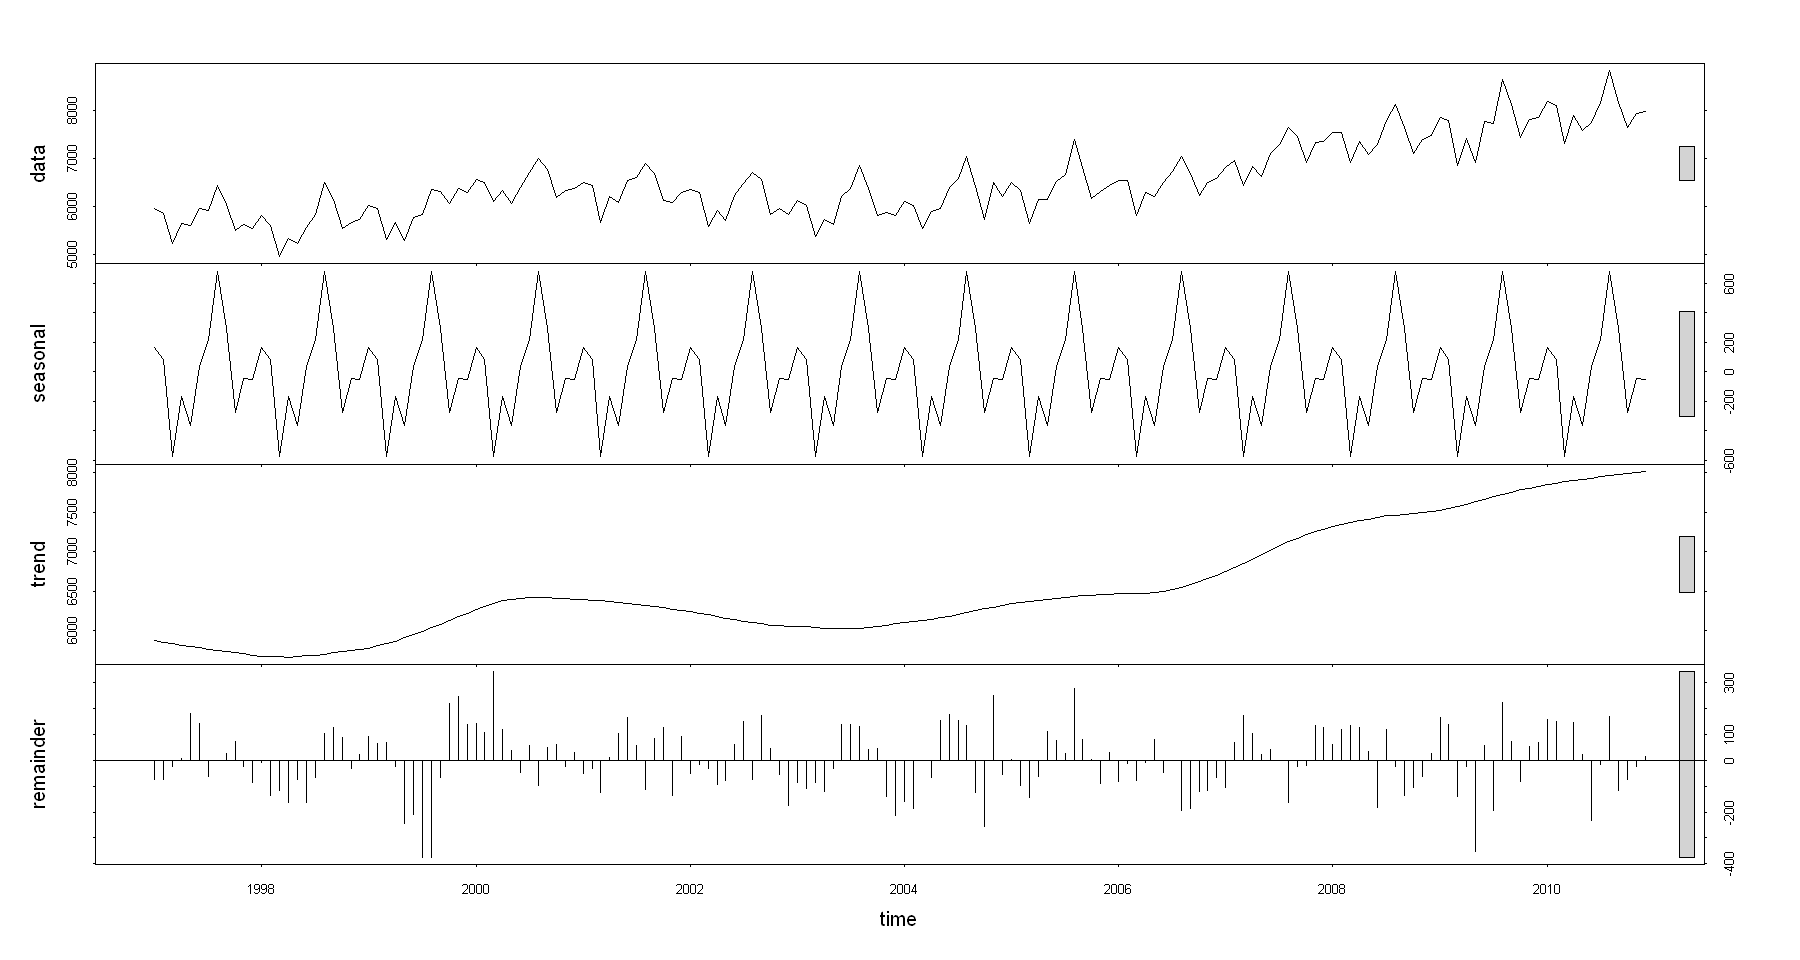

In [14]:
plot(stl(YVR_energy, t.window = 25, s.window='periodic')) 
#t.window = 25 after balancing trend smoothness and remainder effect

#### Describe the characteristics of trend, cycle and seasonality in detail, referring to specific characteristics of the plots. 
Also mention any unusual features, if present. Be specific.

- Seasonality: we see a 12-month seasonality, with a peak in august and a valley in march. We also observe the variation in seasonality to remain constant.
- Trend/cycle: there is a upward trend, consistently increasing after 2003. Previous to that year, there and increase from 1998 to 2001, follow by a decrease between 2001 and 2003
- Unusual features: as described earlier, the is a change in direction of the trend around year 2000, what becomes clear in the remainder factor of the stl plot. 

<div class="alert alert-block alert-warning">
<a id="Causes"></a>

# Potential causes (300 words max.) (3 marks)

Describe what could be causing the patterns that you are seeing in electricity use. Create any relevant plots and include them. Make sure to discuss any specific features of plots. Remember that the original dataset includes other variables! (300 words max.)  
</div>

Several other factors might be influencing the demand increase. According to Alba and Manana (2016)¹, three-quarters of the energy consumed in an airport happen in the terminal building and its features directly impact energy performance. Below we present a table with the characteristics with the most impact.

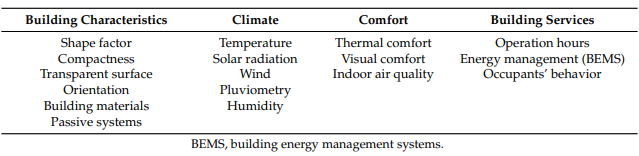

The authors also present that the top 3 consumption systems are: Heating, Ventilation and Air-conditioning (25%), Lighting (20%) and Information and Communication Technologies (18%). 
Using the information available, we will analyze how the number of passengers, the airport area and the outside temperature may be affecting energy consumption, as potential drivers of energy consumption.

- Area - we see a consistent reduction in kWh per sqm through time, indicating a more efficent consumption, despite airport expansion
- Number of passengers - the average consumption per passenger has increased roughly 20% from 1997 to 2010
- Outside temperature - different than one could expect, there is little to no relation between the outside temperature and energy consumption in the airport

¹Alba, S.;Manana, M. (May,2016) Energy Research in Airports: A Review. Energies2016, 9, 349; doi:10.3390/en9050349

In [15]:
# high correlation between energy consumption and total are (0.86) and number of total passengers (0.45) 
round(cor(YVR_data),2)

,energy,mean.temp,total.area,total.passengers,domestic.passengers,US.passengers,international.passengers
energy,1.00,0.18,0.86,0.45,0.48,0.29,0.50
mean.temp,0.18,1.00,0.00,0.76,0.74,0.71,0.70
total.area,0.86,0.00,1.00,0.27,0.31,0.10,0.35
total.passengers,0.45,0.76,0.27,1.00,0.97,0.94,0.94
domestic.passengers,0.48,0.74,0.31,0.97,1.00,0.85,0.87
US.passengers,0.29,0.71,0.10,0.94,0.85,1.00,0.86
international.passengers,0.50,0.70,0.35,0.94,0.87,0.86,1.00


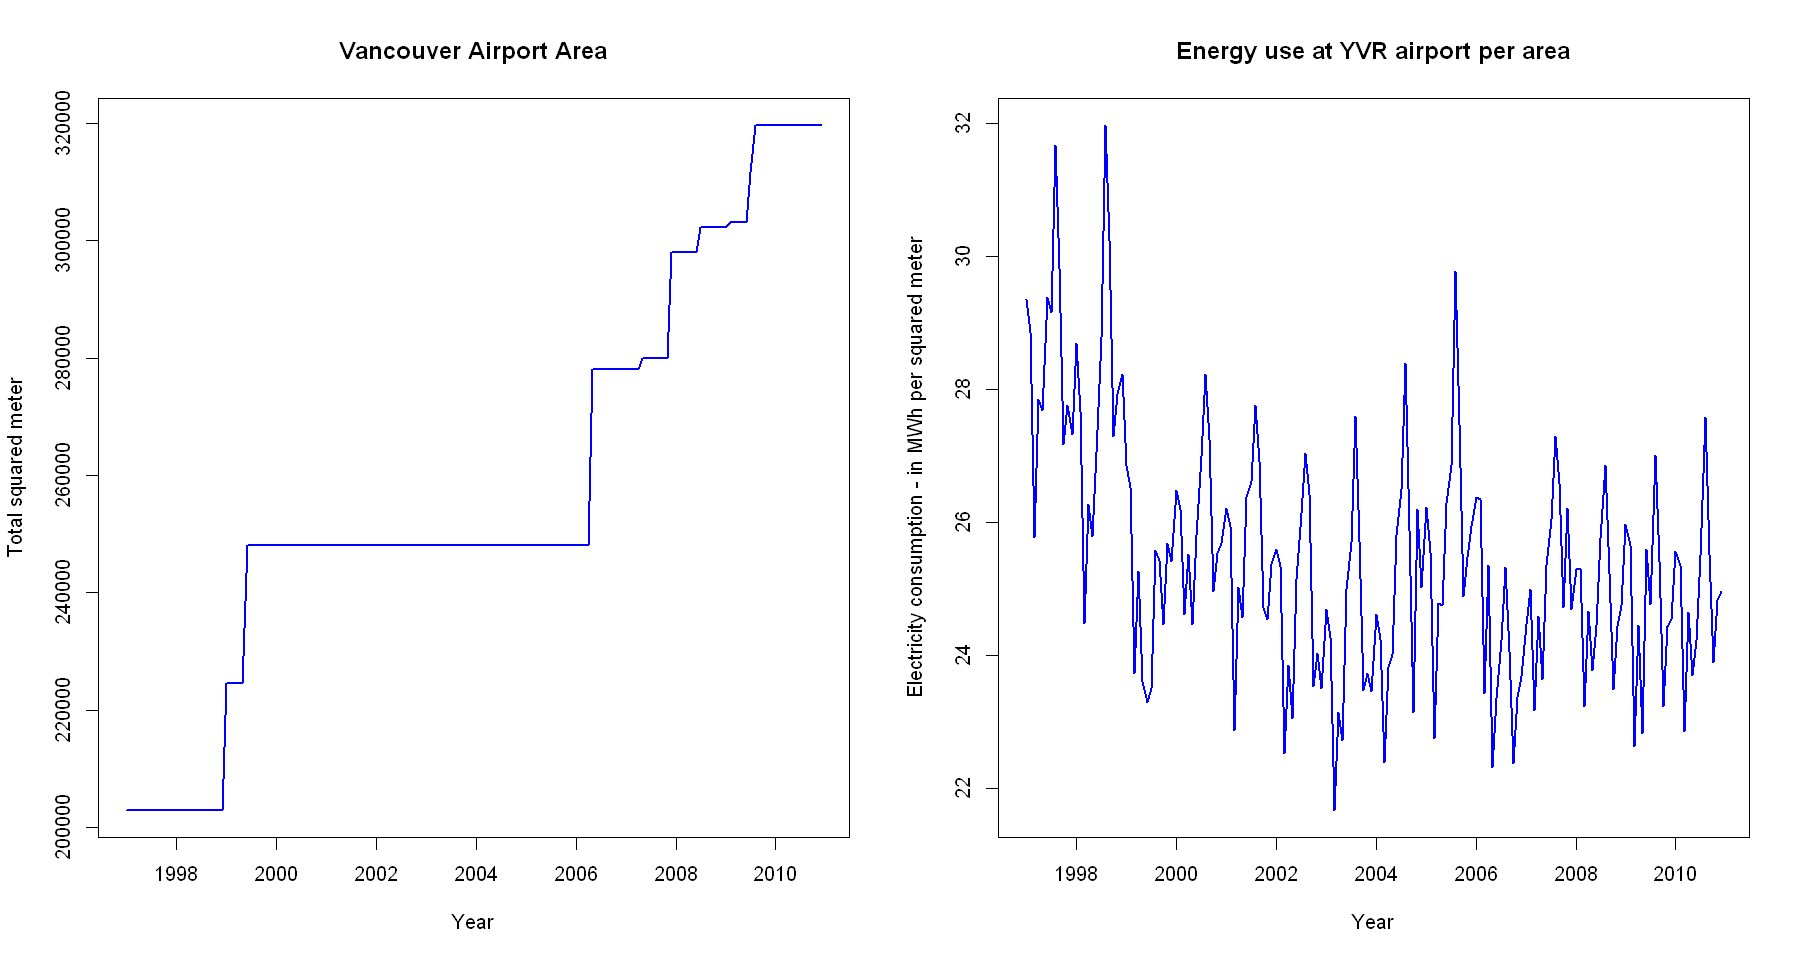

In [16]:
#Area
YVR_data_area <- YVR_energy/YVR_data[,3]*10^3
#colors <- seq(1,14, by=1)
par(mfrow=c(1,2))
#colors <- seq(1,14, by=1)
plot(YVR_data[,3]
    ,main =  "Vancouver Airport Area"
    ,xlab="Year"
    ,ylab="Total squared meter"
    ,lwd = 2
    ,col = "blue")

plot(YVR_data_area
    ,main =  "Energy use at YVR airport per area"
    ,xlab="Year"
    ,ylab="Electricity consumption - in MWh per squared meter"
    ,lwd = 2,
    ,col = "blue")

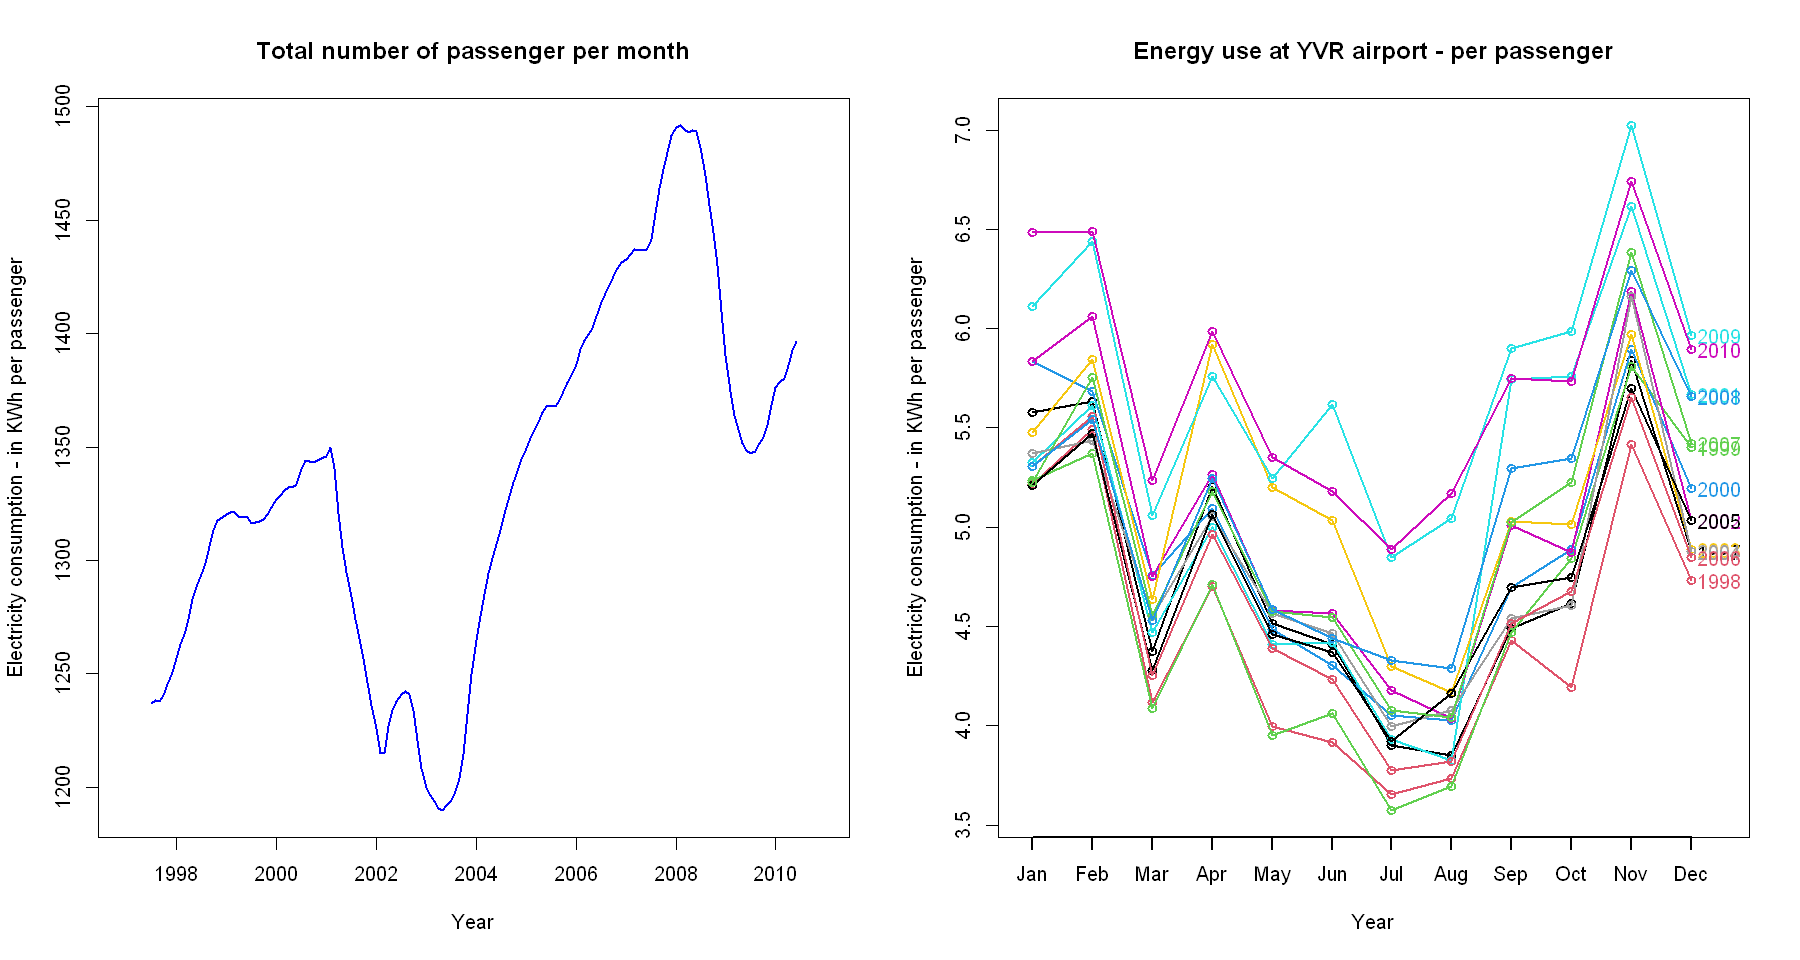

In [17]:
# Number of passengers
YVR_data_passenger <- YVR_energy/YVR_data[,4]
par(mfrow=c(1,2))

plot(decompose(YVR_data[,4],"additive")$trend
    ,main =  "Total number of passenger per month"
    ,xlab="Year"
    ,ylab="Electricity consumption - in KWh per passenger"
    ,lwd = 2
    ,col = "blue")

colors <- seq(1,14, by=1)
seasonplot(YVR_data_passenger
        ,year.labels=TRUE
        ,main =  "Energy use at YVR airport - per passenger"
        ,xlab="Year"
        ,ylab="Electricity consumption - in KWh per passenger"
        ,lwd = 2
        ,col = colors)

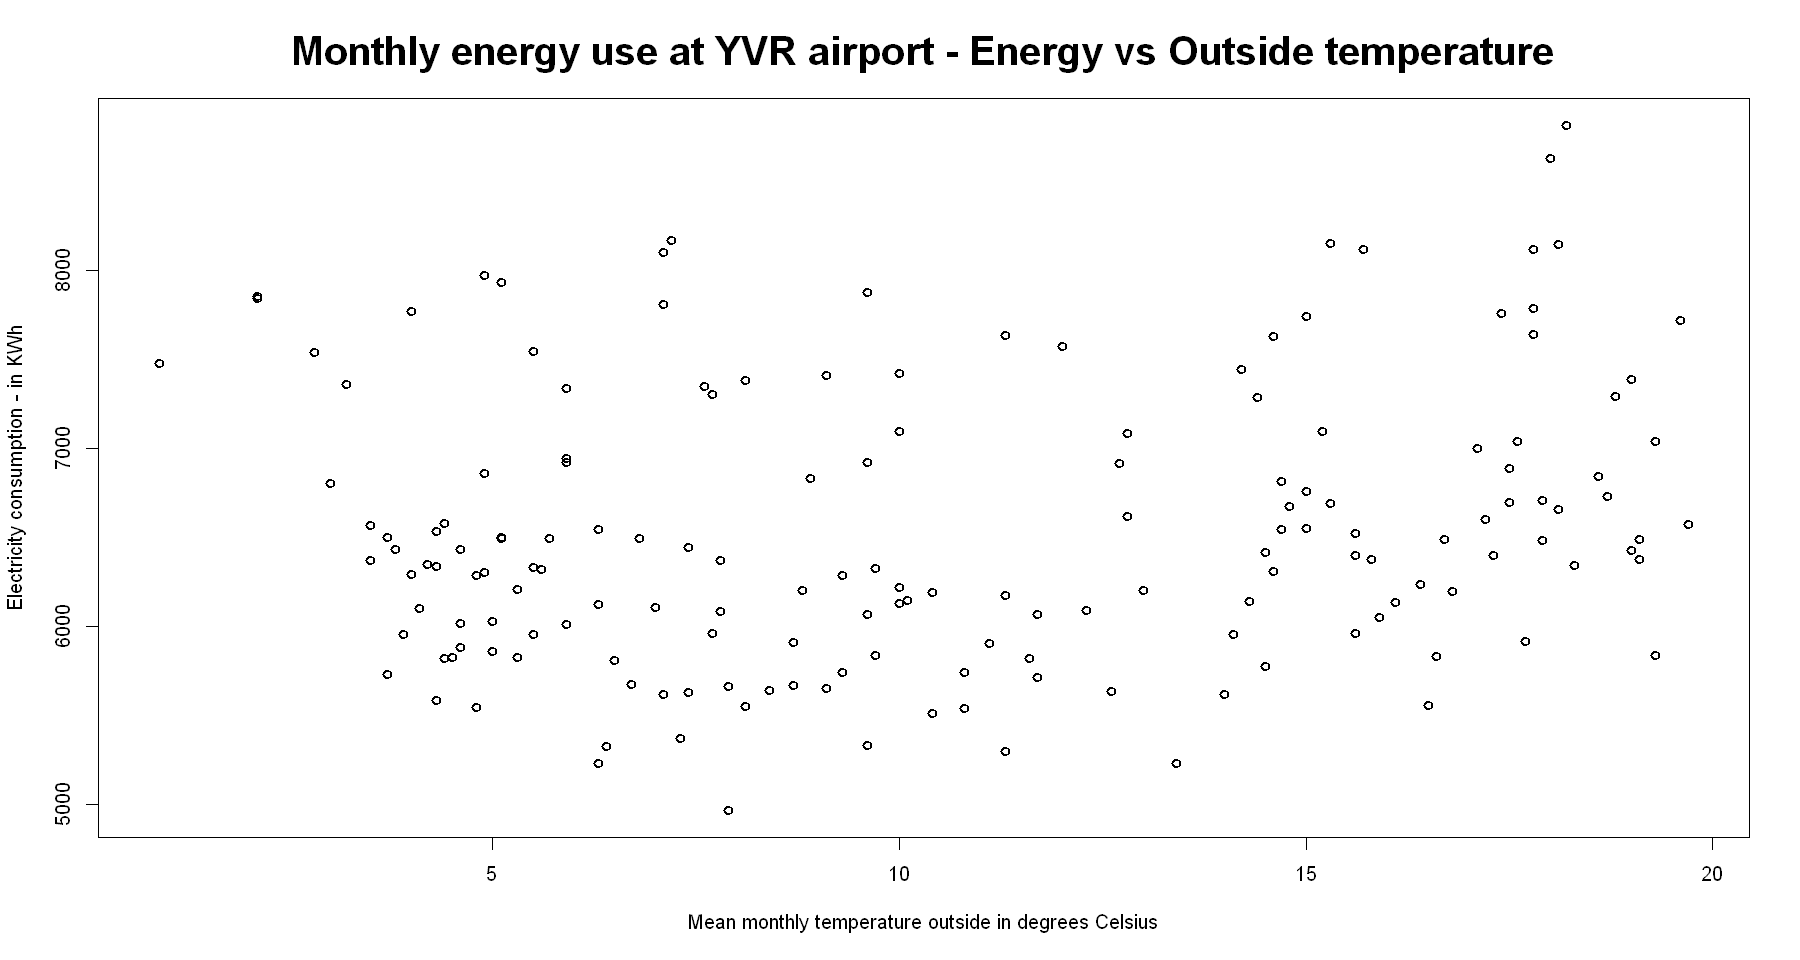

In [18]:
# Outside temperature - no clear relation between variables
plot(energy ~ mean.temp, data = YVR_data 
    ,main = "Monthly energy use at YVR airport - Energy vs Outside temperature"
    ,xlab= "Mean monthly temperature outside in degrees Celsius"
    ,ylab= "Electricity consumption - in KWh"
    ,lwd = 2
    ,cex.main=2)

----

<div class="alert alert-block alert-success">
<a id="Basic"></a>

# Basic forecasting methods
</div>  

Use the basic methods we have learned to develop forecasts for the test set. Plot in the following colours:  

mean method (blue)  
drift method (green)  
naïve method (red)  
seasonal naïve method (purple)  

 
## Visual comparison and assessment of basic methods (1.25 marks)

Plot the training set and test set data in black. Include the forecasts of the test set for each of the basic forecasting methods in a different colour (colours are given above) with a legend to explain.  

Prepare the plot for publication and upload it.

 

From a visual assessment, which of the basic forecasting methods seems to produce the best forecasts of the test set? Discuss briefly. (4 sentences max.)  
    

In [19]:
horizon <- 36
YVR_energy.fit_mean <-meanf(YVR_energy.training, horizon);
YVR_energy.fit_drift <-rwf(YVR_energy.training, horizon, drift=TRUE);
YVR_energy.fit_naive <-naive(YVR_energy.training, horizon);
YVR_energy.fit_snaive <-snaive(YVR_energy.training, horizon);

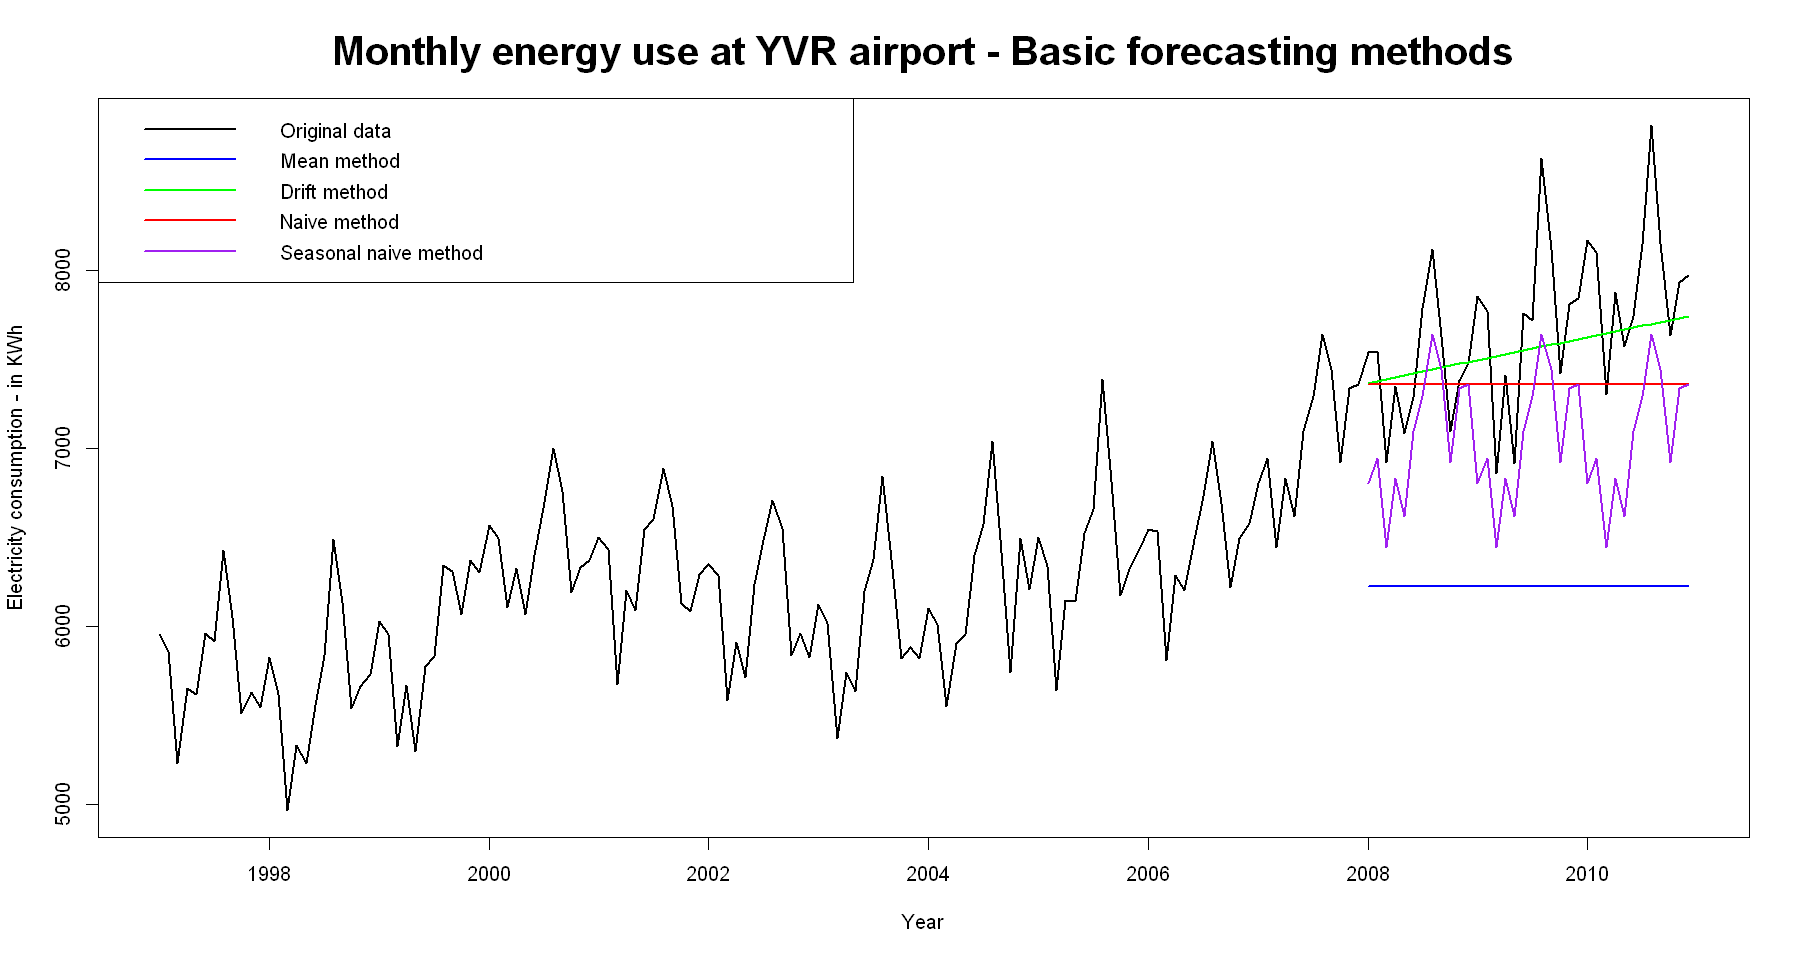

In [20]:
plot(YVR_energy
    ,main = "Monthly energy use at YVR airport - Basic forecasting methods"
    ,xlab="Year"
    ,ylab="Electricity consumption - in KWh"
    ,lwd = 2
    ,cex.main = 2)

lines(YVR_energy.fit_mean$mean,col='blue',lwd=2)
lines(YVR_energy.fit_drift$mean,col='green',lwd=2)
lines(YVR_energy.fit_naive$mean,col='red',lwd=2)
lines(YVR_energy.fit_snaive$mean,col='purple',lwd=2)

legend("topleft"
       ,lty=1, lwd=2
       ,col=c('black','blue','green','red','purple')
       ,legend=c("Original data","Mean method","Drift method","Naive method","Seasonal naive method"))

Which of the basic forecasting methods seems to produce the best forecasts of the test set? Discuss briefly.

We see the drift method is the best out of the four tested method, since it is the only one capable of capture the increasing trend present since 2004 (as we have discussed earlier). 


## Accuracy measures (1 mark)
Create a table with the RMSE, MAE, MAPE, and MASE for the test set for each of the four basic methods. Round values to 1 decimal place.

In [21]:
method <- c("Mean method","Drift method","Naive method","Seasonal naive method")
acc <-cbind(method, rbind(round(accuracy(YVR_energy.fit_mean, YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(YVR_energy.fit_drift, YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(YVR_energy.fit_naive, YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(YVR_energy.fit_snaive, YVR_energy.test)[2,c(2,3,5,6)],1)))

acc

method,RMSE,MAE,MAPE,MASE
Mean method,1528.5,1463.8,18.8,5.5
Drift method,416,328.5,4.2,1.2
Naive method,550.1,443.2,5.6,1.7
Seasonal naive method,698.7,626.8,8,2.4


## Comparison of basic methods (1 mark)
Based on the accuracy measures for the test set, which of the basic forecasting methods seems to forecast the test set the best? Interpret the MASE for this method. (4 sentences max.) 

As expected after visually inspecting the plots, the drift method has the best accuracy metrics out of the 4 tested models. Particularly for the MASE, in which the lower the better, we see the drift method produces results similar to the benchmark (the mean absolute deviation of a naive forecast)

----

<div class="alert alert-block alert-success">
<a id="ETS"></a>

# Exponential Smoothing (ETS) model

Fit ETS models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix A**.
    
</div>    

## What is the model, using the ETS(__, __, __) notation? (0.25 marks)

In [59]:
Best_ETS <- ets(YVR_energy.training)
Best_ETS

ETS(A,N,A) 

Call:
 ets(y = YVR_energy.training) 

  Smoothing parameters:
    alpha = 0.8142 
    gamma = 1e-04 

  Initial states:
    l = 6028.2465 
    s = -53.9951 -35.1353 -238.2527 322.9962 671.4127 226.3734
           66.8415 -359.4489 -191.2235 -589.7391 56.3954 123.7755

  sigma:  133.9544

     AIC     AICc      BIC 
1952.670 1956.808 1995.912 

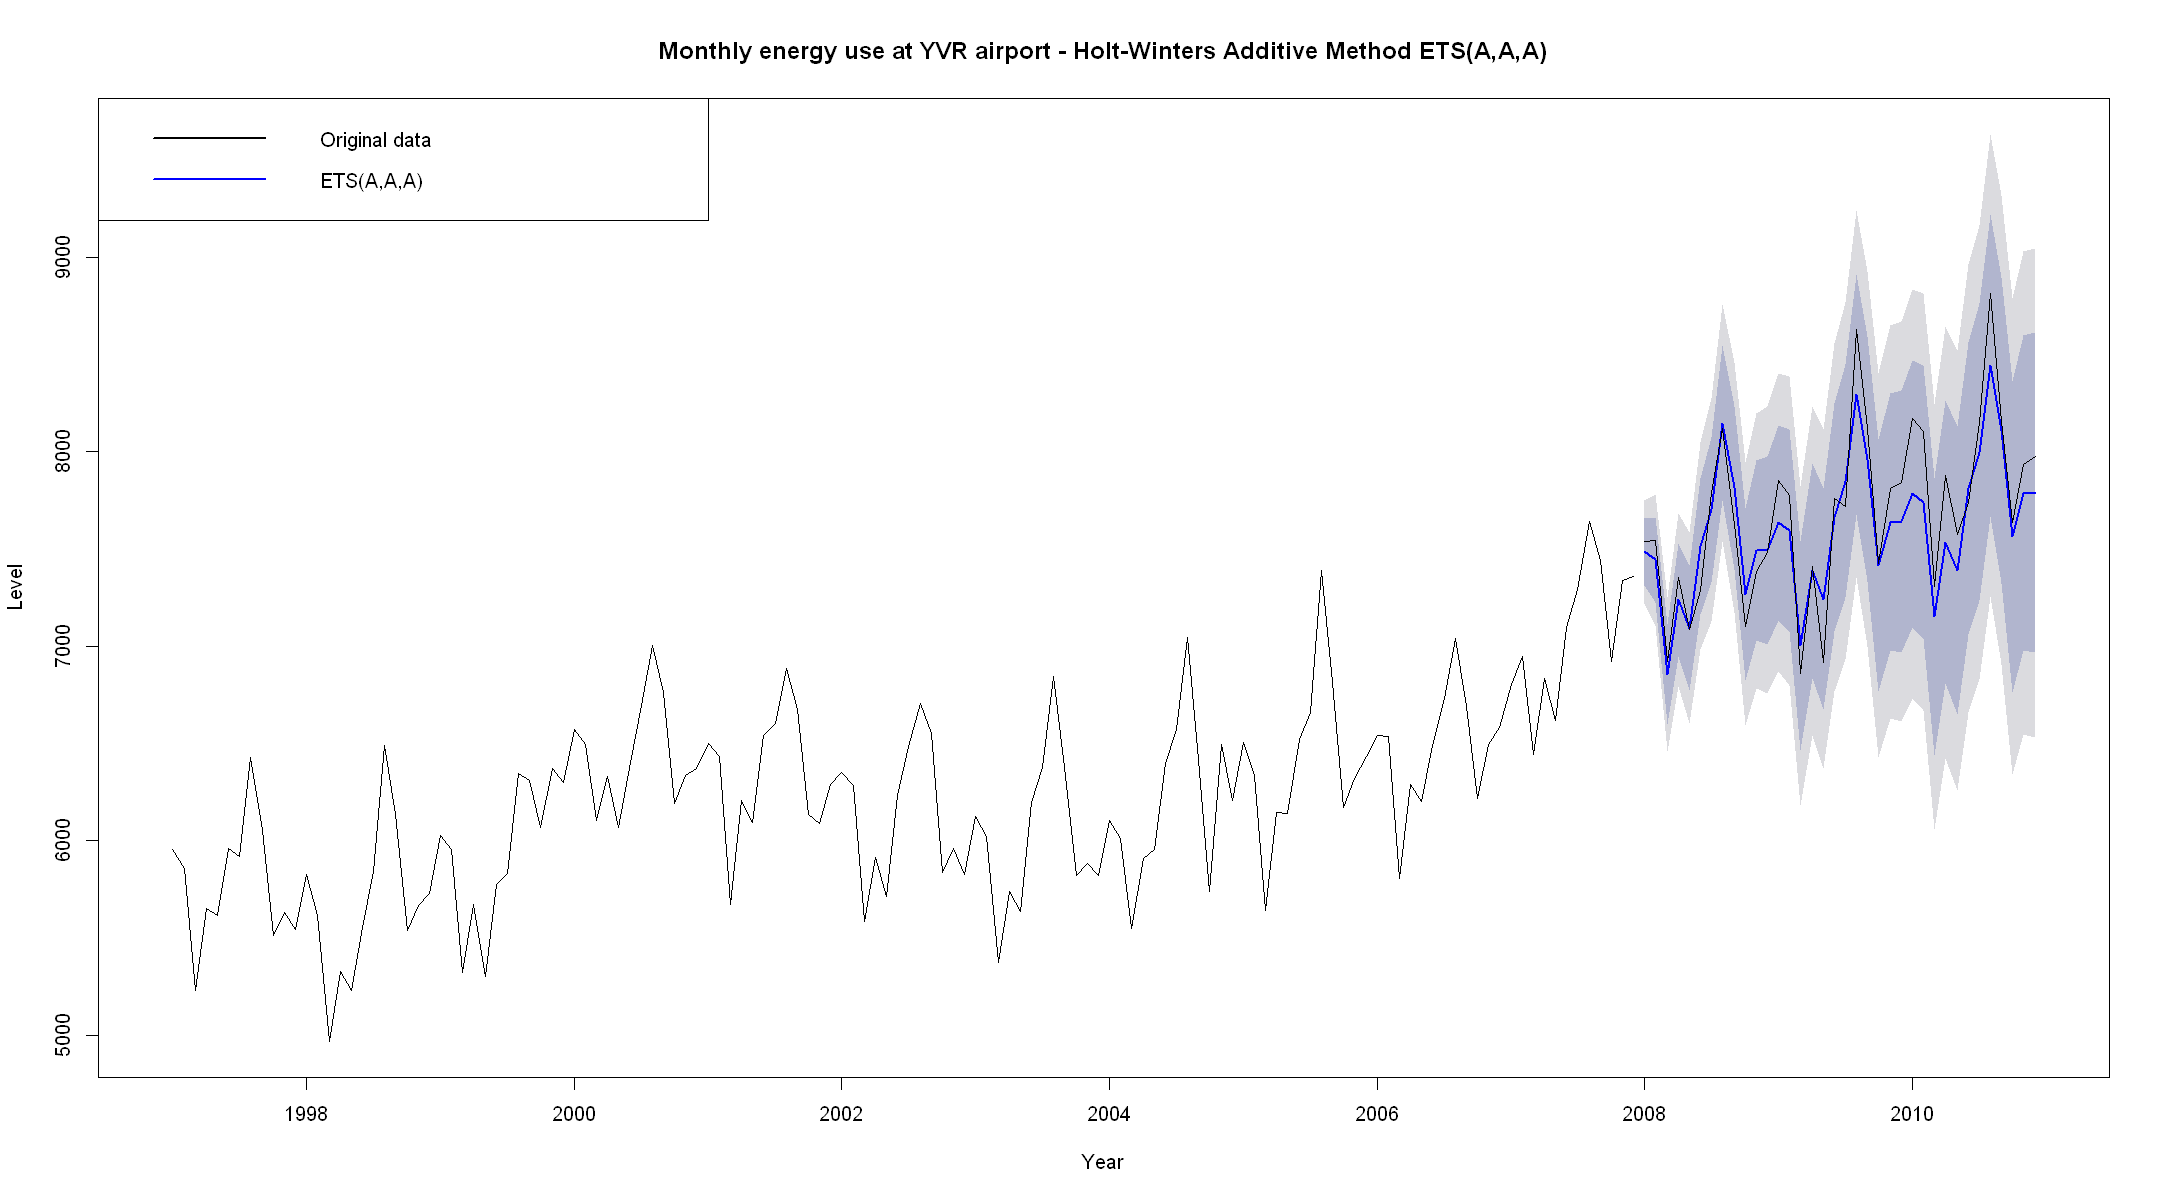

In [73]:
YVR.hwa1 <- hw(YVR_energy.training, h=36, seasonal="additive")
plot(YVR.hwa1, main="Monthly energy use at YVR airport - Holt-Winters Additive Method ETS(A,A,A)", ylab="Level", xlab="Year", fcol='blue')
lines(YVR_energy.test)

legend("topleft"
       ,lty=1, lwd=2
       ,col=c('black','blue')
       ,legend=c("Original data","ETS(A,A,A)"))

## What are the estimates of the smoothing parameters? (0.25 marks)

In [74]:
summary(YVR.hwa1)


Forecast method: Holt-Winters' additive method

Model Information:
Holt-Winters' additive method 

Call:
 hw(y = YVR_energy.training, h = 36, seasonal = "additive") 

  Smoothing parameters:
    alpha = 0.7846 
    beta  = 1e-04 
    gamma = 1e-04 

  Initial states:
    l = 5879.3546 
    b = 12.3652 
    s = -36.7977 -27.2016 -238.1219 321.0426 666.3048 232.4424
           58.5104 -349.8579 -192.2142 -564.3842 38.3341 91.9432

  sigma:  134.6878

     AIC     AICc      BIC 
1955.855 1961.224 2004.863 

Error measures:
                    ME     RMSE      MAE         MPE     MAPE      MASE
Training set -1.171192 126.2613 98.95847 -0.06213835 1.594299 0.3734517
                    ACF1
Training set 0.005411505

Forecasts:
         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Jan 2008       7485.996 7313.387 7658.605 7222.013 7749.979
Feb 2008       7444.636 7225.222 7664.050 7109.071 7780.200
Mar 2008       6854.252 6596.383 7112.120 6459.876 7248.627
Apr 2008       7238.806 694

Smoothing parameters:
alpha = 0.7846 
beta  = 1e-04 
gamma = 1e-04 

## Explain why this model is appropriate based on the features of the data. (4 sentences max.) (1.5 marks)

The ETS algorithm is especially useful for datasets with seasonality,trend and cyclic behaviours.Also, we see that all these three are increasing linearly with time. We use the additive model as the variation in seasonality is approximately constant throughout time. Also, we observe that the accuracy measures of the selected model is the highest.

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

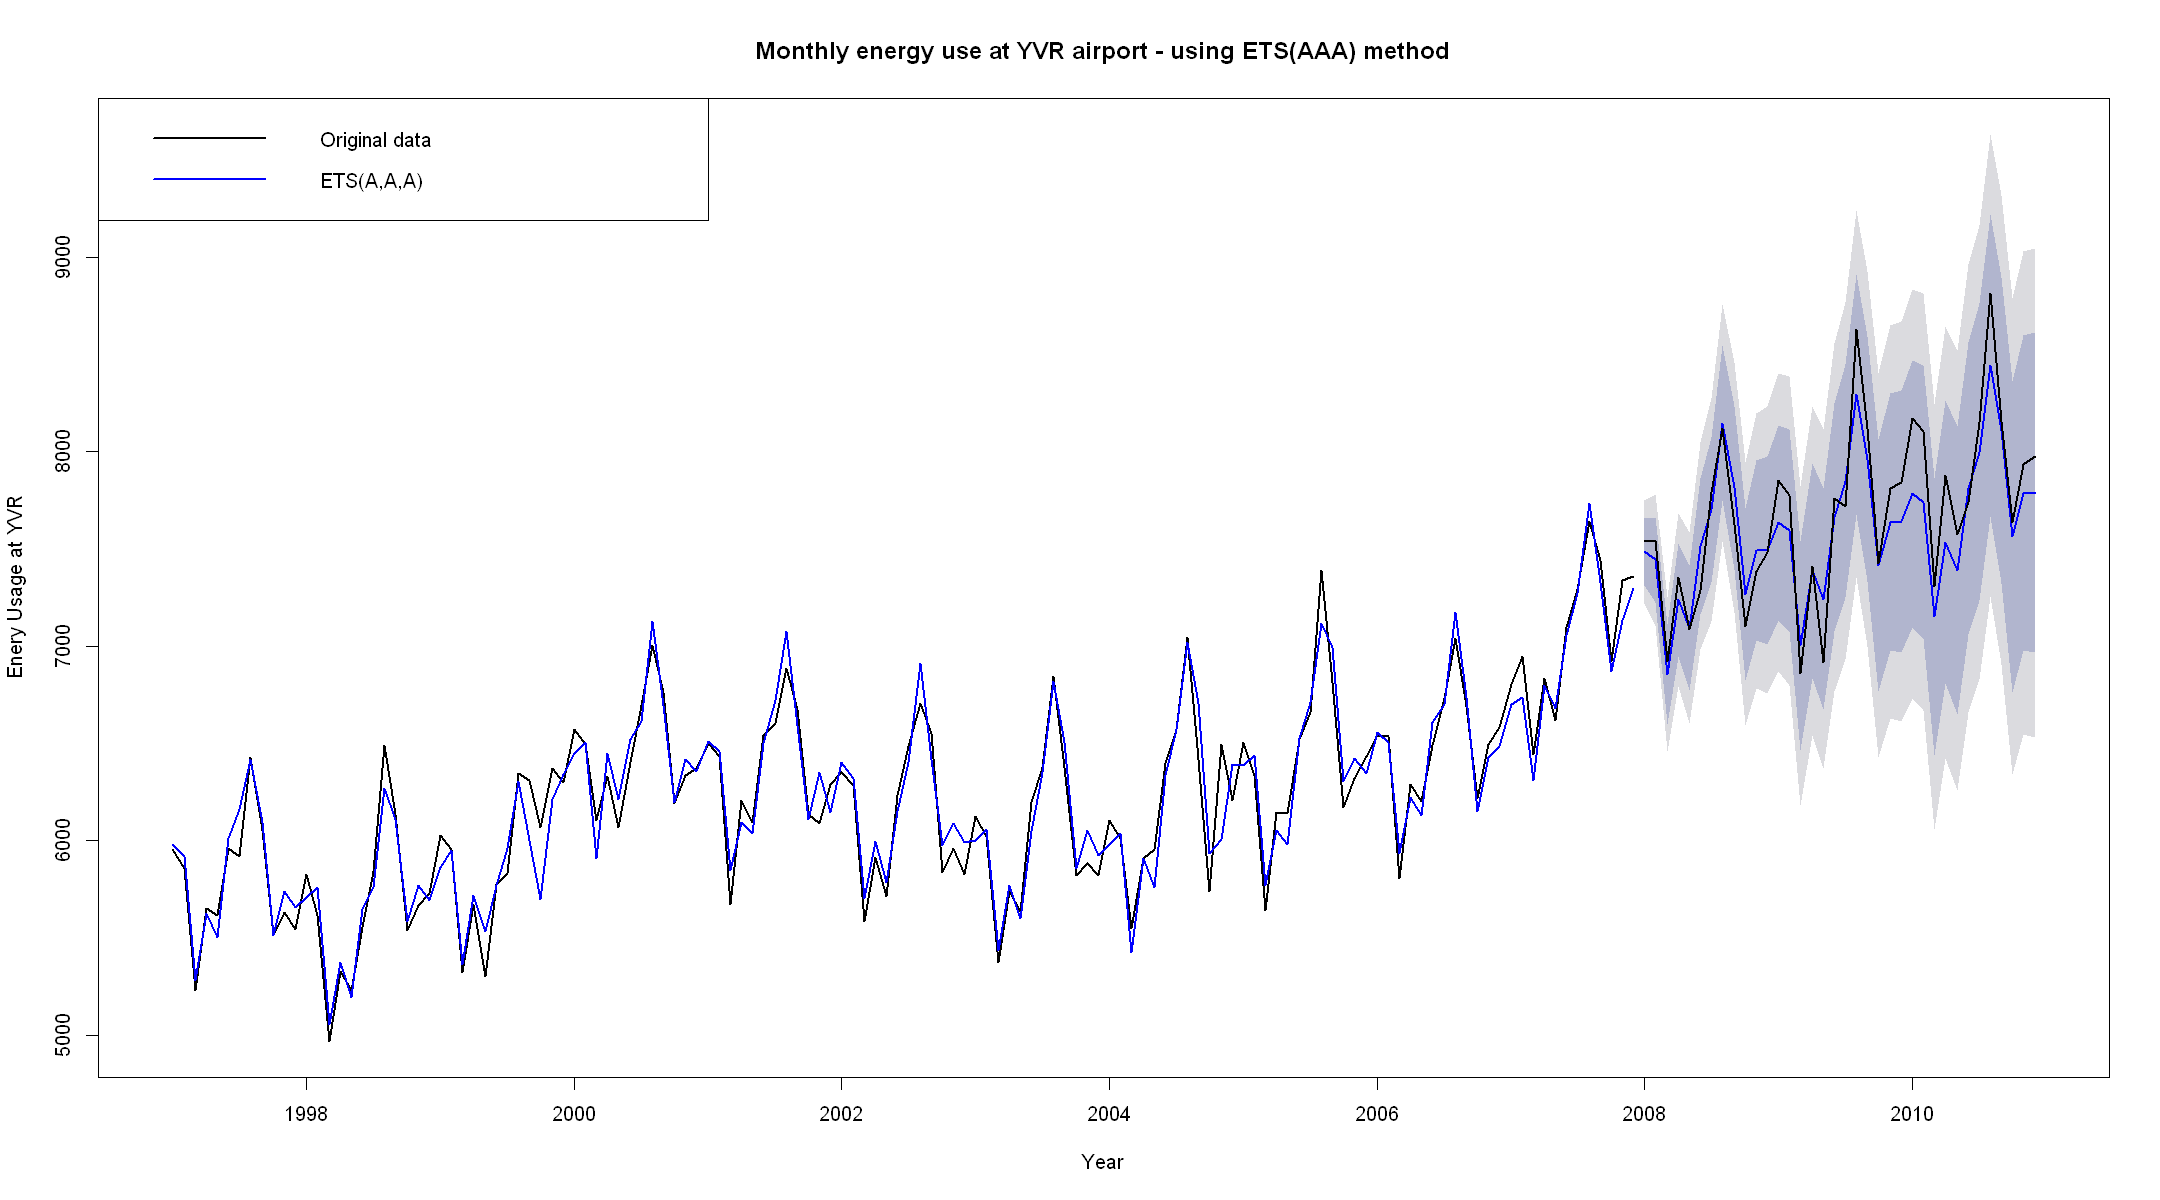

In [70]:
plot(YVR.hwa1, main="Monthly energy use at YVR airport - using ETS(AAA) method",ylab="Enery Usage at YVR",xlab="Year", lwd = 2, fcol='blue')
lines(YVR_energy.test,lwd=2)
lines(fitted(YVR.hwa1), col="blue",lwd=2)

legend("topleft"
       ,lty=1, lwd=2
       ,col=c('black','blue')
       ,legend=c("Original data","ETS(A,A,A)"))

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ETS models that you tried. (Present any values, then 4 sentences max.)

In [26]:
round(accuracy(forecast(YVR.hwa1, 36)),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-1.17,126.26,98.96,-0.06,1.59,0.37,0.01


## Accuracy measures (1 mark)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [27]:
accuracy(forecast(YVR.hwa1, 36), YVR_energy.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,-1.171192,126.2613,98.95847,-0.06213835,1.594299,0.3734517,0.005411505,NA
Test set,78.013711,188.9986,155.89604,0.92977736,2.003689,0.5883240,0.308229307,0.3928985


## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

## Residual diagnostics (3.5 marks)

a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks)  
b) Use the checkresiduals() function. Which properties of residuals have been met or not met according to these plots? (2 marks)  
c) Interpret the results of a portmanteau test for autocorrelations. Clearly state the hypotheses, the number of lags tested, the test statistic, p-value, decision, and concluding sentence. (1 mark)  

In [28]:
# Add theoryy

[1] -1.171192


	Ljung-Box test

data:  Residuals from Holt-Winters' additive method
Q* = 14.031, df = 8, p-value = 0.08095

Model df: 16.   Total lags used: 24



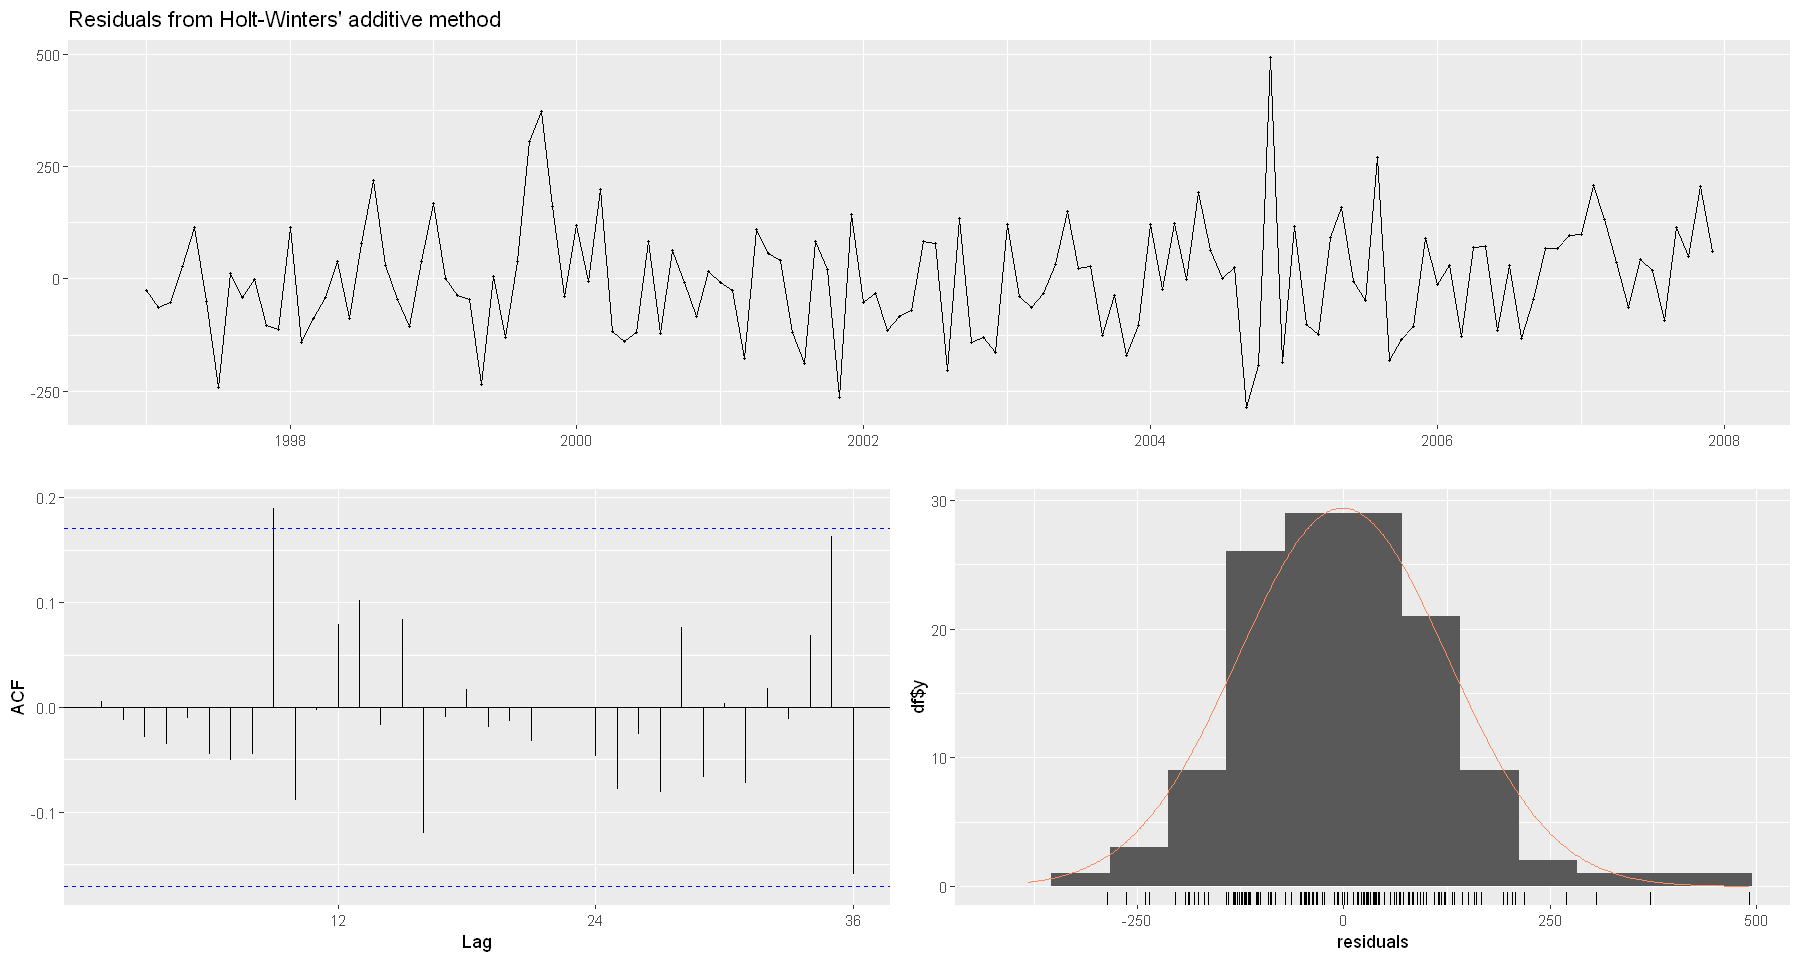

In [29]:
res <- residuals(YVR.hwa1)
mean.res <- mean(res, na.rm=TRUE)
mean.res
checkresiduals(YVR.hwa1)

one significant autocorrelation
Variance of residuals stays approximately constant through time. Residuals are approximately normally distributed.

----

<div class="alert alert-block alert-success">
<a id="ARIMA"></a>
    
# ARIMA model
    
Fit ARIMA models to the training set. Find your best model and present it here. Include any other models you tried in **Appendix B**.
    
</div>    

## What is the model, using the ARIMA(p, d, q)X(P, D, Q)m notation? (0.25 marks)

In [87]:
# After inspecting ACF and PACF plots, we select ARIMA(0, 1, 3)X(0, 1, 3)12 as our best ARIMA model
Arima_best <- Arima(YVR_energy.training, order=c(0, 1, 3), seasonal=c(0, 1, 3))
Arima_best

Series: YVR_energy.training 
ARIMA(0,1,3)(0,1,3)[12] 

Coefficients:
          ma1     ma2      ma3     sma1     sma2     sma3
      -0.2145  0.0231  -0.0805  -0.8045  -0.1209  -0.0746
s.e.   0.0921  0.0941   0.0974   0.1728   0.1123   0.1086

sigma^2 = 17996:  log likelihood = -760.8
AIC=1535.6   AICc=1536.61   BIC=1555.05

## What are the estimates of the parameters? (0.25 marks)

In [31]:
# our model has 6 coeficients - 3 seasonal moving average (sma) and 3 non seasonal moving average (ma)
# the estimates parameters of the model are 
round(Arima_best$coef,4)

ma1     ma2     ma3    sma1    sma2    sma3 
-0.2145  0.0231 -0.0805 -0.8045 -0.1209 -0.0746

## Appropriateness of model (2 marks)
Explain why this model is appropriate based on the features of the data. Include the ACF and PACF plots of the differenced data. (5 sentences max.)

[1] 7.64

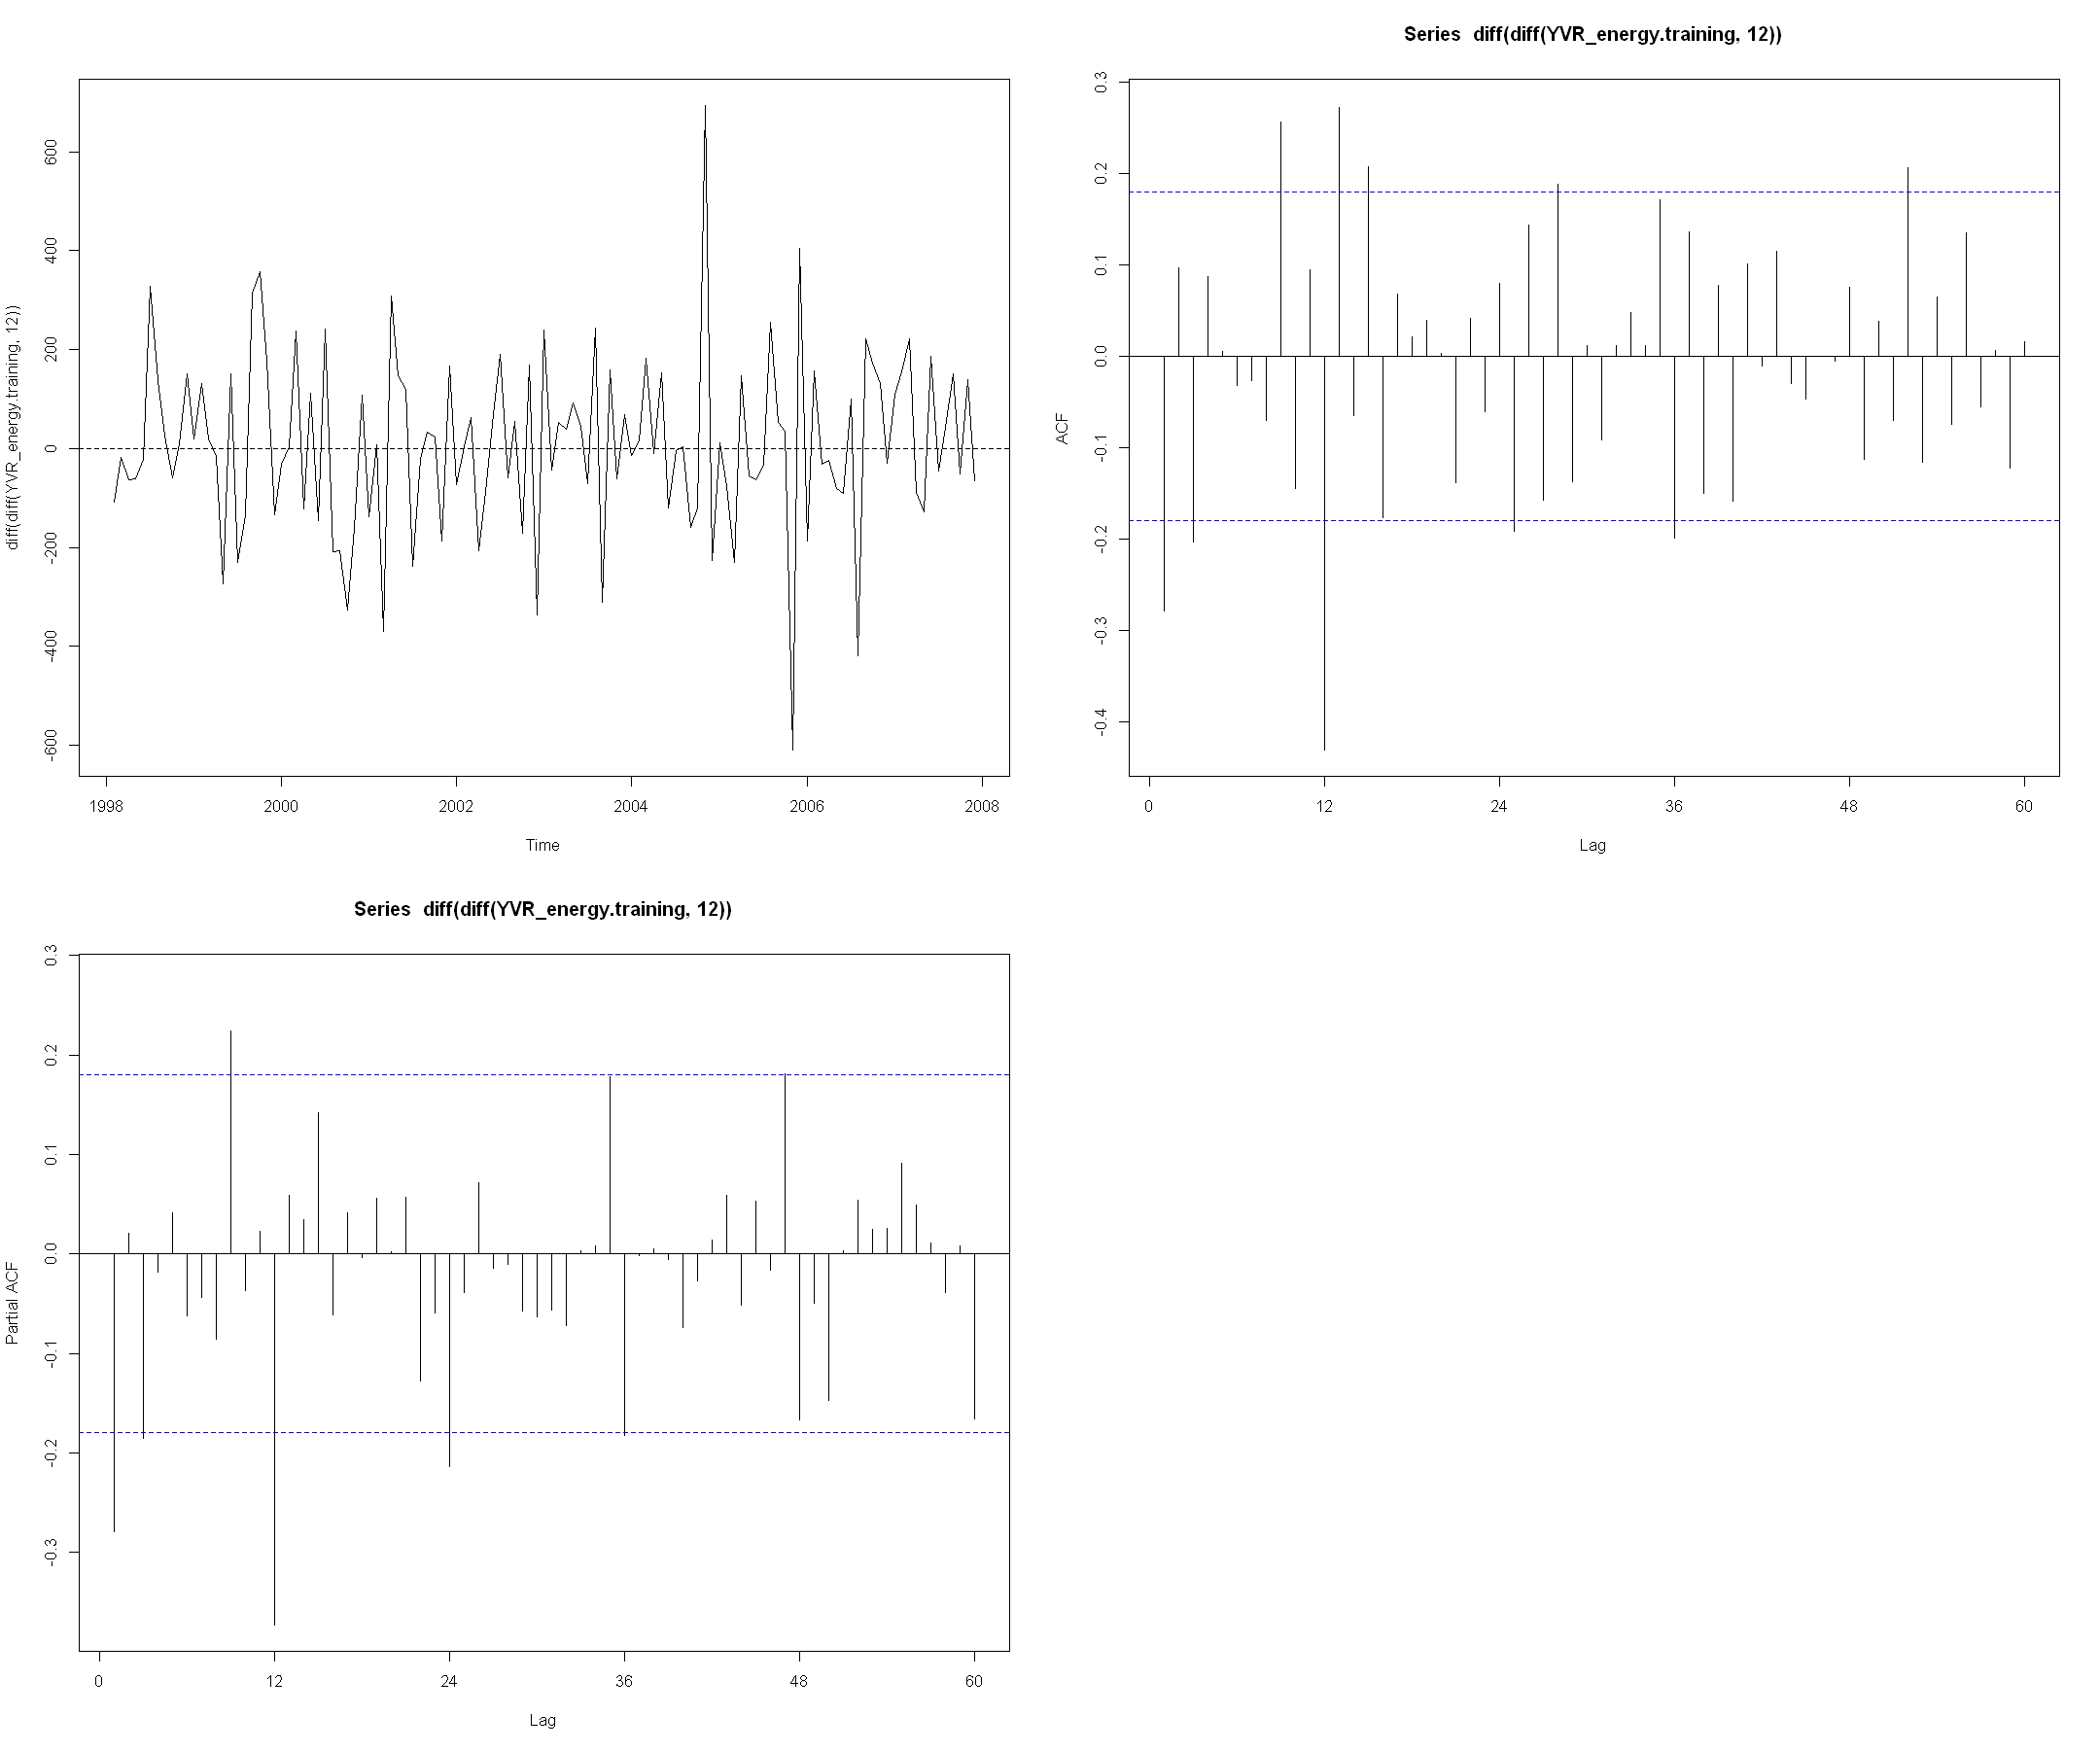

In [32]:
# as discussed in Exploratory Data Analysis section, we see the data has trend and seasonality. 
#To make it stationary, we did 1 seasonal differencing (12 months) and 1 non-seasonal differencing
par(mfrow=c(2,2))
options(repr.plot.width=18, repr.plot.height=15)

plot(diff(diff(YVR_energy.training,12)));abline(0,0, lty=2) # Stationary, similar to white noise. Mean = 7.64
round(mean(diff(diff(YVR_energy.training,12))),2)

Acf(diff(diff(YVR_energy.training,12)),lag=60) 
Pacf(diff(diff(YVR_energy.training,12)),lag=60)

### Reflection  on Appropriateness of model

#### Seasonal part (analysing lags that are multiples of seasonality -> 12, 24, 36, 48, 60 )
- ACF plot: significant correlations in lags 12, 24 and 36 (meaning we should use Q=3)
- PACF plot: significant correlations in lags 12, 24 and 36 (meaning we should use P=3)

#### For the non-seasonal part (analysing consecutive lags -> 1, 2, 3 ... )
- ACF plot: significant correlations in lags 1 and 3 (meaning we should use q=3). Higher order (like lag 9 and 13) may be due to random chance
- PACF plot: significant correlations in lags 1 and 3 (meaning we should use q=3). Higher order (like lag 9) may be due to random chance

Based on that, candidate models were: P=3 or Q=3, p=1 or 3, q=1 or 3. The possible combinations were:
- arima1: ARIMA(1, 1, 0)X(3, 1, 0)12
- arima2: ARIMA(3, 1, 0)X(3, 1, 0)12
- arima3: ARIMA(1, 1, 0)X(0, 1, 3)12
- arima4: ARIMA(3, 1, 0)X(0, 1, 3)12
- arima5: ARIMA(0, 1, 1)X(3, 1, 0)12
- arima6: ARIMA(0, 1, 3)X(3, 1, 0)12
- arima7: ARIMA(0, 1, 1)X(0, 1, 3)12
- arima8: ARIMA(0, 1, 3)X(0, 1, 3)12

## Model plot (0.75 marks)

Create a time plot of the data in black with a gap between the training set and test set data.

Show the fitted values of the model graphed in blue. Show the forecasts for the test set with a bold blue line and the 80% and 95% prediction intervals as shaded regions.

Prepare this plot for publication and upload it.

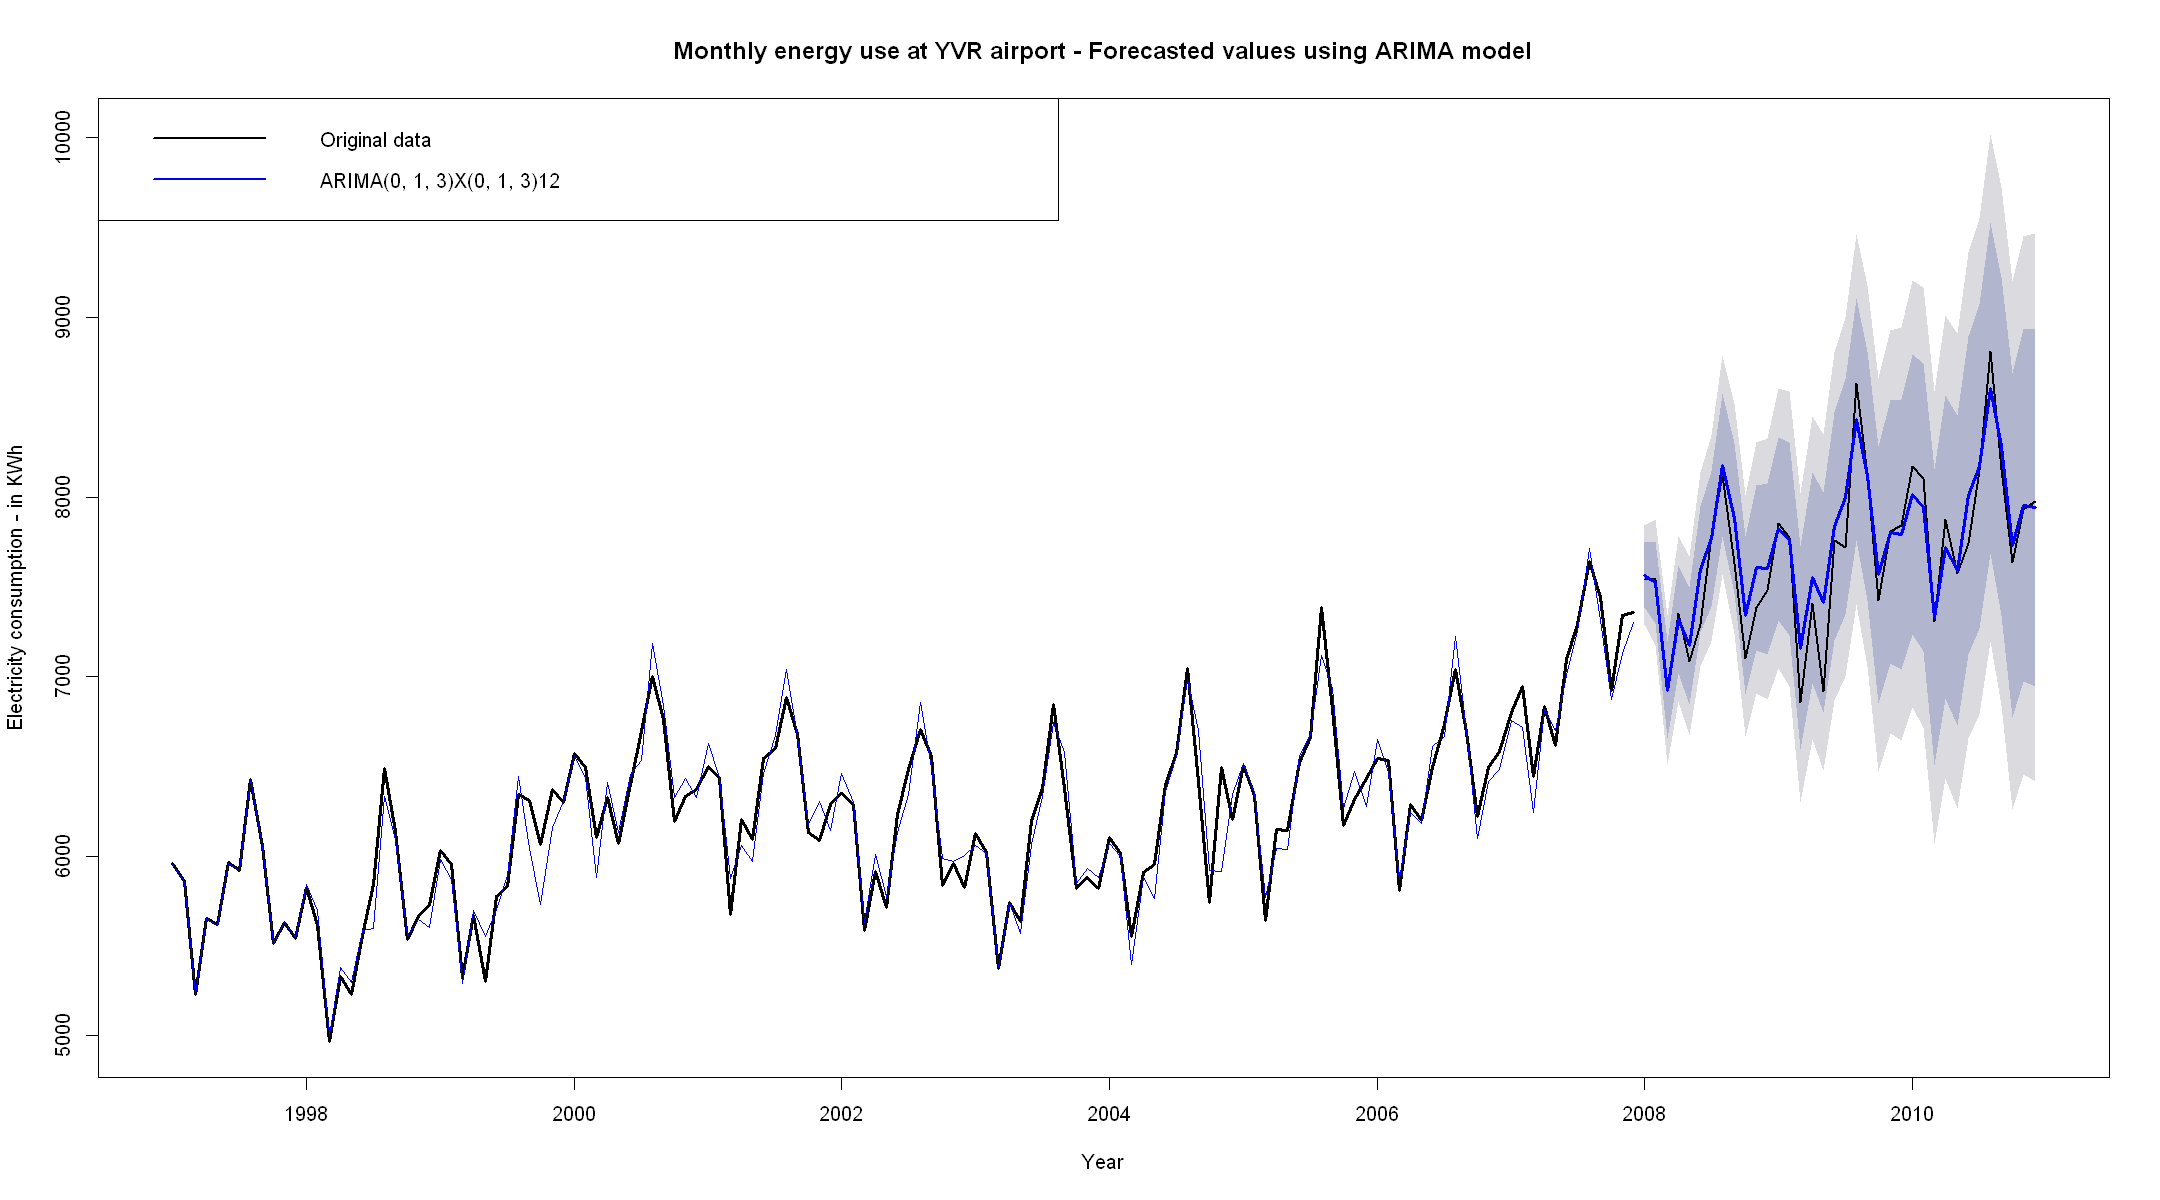

In [33]:
options(repr.plot.width=18, repr.plot.height=10)
YVR_energy.fit_arima <-forecast(Arima_best,horizon);

plot(YVR_energy.fit_arima
    ,main = "Monthly energy use at YVR airport - Forecasted values using ARIMA model"
    ,xlab="Year"
    ,ylab="Electricity consumption - in KWh"
    ,lwd = 3)

lines(YVR_energy.test,col='black',lwd=2)
lines(YVR_energy.fit_arima$mean,col='blue',lwd=3)
lines(fitted(YVR_energy.fit_arima), col="blue")

legend("topleft"
       ,lty=1, lwd=2
       ,col=c('black','blue')
       ,legend=c("Original data","ARIMA(0, 1, 3)X(0, 1, 3)12"))

## Goodness of fit (1 mark)

Quantify and discuss the goodness of fit of the model to the training set. You can compare this model to other ARIMA models that you tried. (Present any values, then 4 sentences max.)

In [81]:
method <- c("Mean method","Drift method","Naive method","Seasonal naive method","ARIMA(0, 1, 3)X(0, 1, 3)12")
acc <-cbind(method, rbind(round(accuracy(YVR_energy.fit_mean)[1,c(2,3,5,6)],2)
                    ,round(accuracy(YVR_energy.fit_drift)[1,c(2,3,5,6)],2)
                    ,round(accuracy(YVR_energy.fit_naive)[1,c(2,3,5,6)],2)
                    ,round(accuracy(YVR_energy.fit_snaive)[1,c(2,3,5,6)],2)
                    ,round(accuracy(YVR_energy.fit_arima, YVR_energy.test)[1,c(2,3,5,6)],2)))

acc

method,RMSE,MAE,MAPE,MASE
Mean method,507.84,406.43,6.58,1.53
Drift method,371.66,309.39,5.04,1.17
Naive method,371.81,310.29,5.05,1.17
Seasonal naive method,343.35,264.98,4.16,1
"ARIMA(0, 1, 3)X(0, 1, 3)12",124.12,90.11,1.43,0.34


We see the MASE for chosen ARIMA model is less than 1, indicating a better fit to the training set as the naive method to the training set. Also, the ARIMA(0, 1, 3)X(0, 1, 3)12 present better accuracy metrics than any other basic forecasting methods, suggesting it is much better in for the forecasting task

## Accuracy measures (1 mark)
Calculate the accuracy measures (RMSE, MAE, MAPE, MASE) to show how well the model forecasts for the test set.

In [35]:
round(accuracy(YVR_energy.fit_arima, YVR_energy.test),2)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,10.94,124.12,90.11,0.15,1.43,0.34,-0.01,NA
Test set,-62.54,167.76,122.11,-0.89,1.62,0.46,0.17,0.36


## Accuracy of forecasts (1 mark)
Discuss how well this model forecasts the test set based on any plots or values that you calculated in previous questions. Remember that you can compare it to the basic methods. (4 sentences max.)

In [83]:
method <- c("Mean method","Drift method","Naive method","Seasonal naive method","ARIMA(0, 1, 3)X(0, 1, 3)12")
acc <-cbind(method, rbind(round(accuracy(YVR_energy.fit_mean, YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(YVR_energy.fit_drift, YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(YVR_energy.fit_naive, YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(YVR_energy.fit_snaive, YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(YVR_energy.fit_arima, YVR_energy.test)[2,c(2,3,5,6)],1)))

acc

method,RMSE,MAE,MAPE,MASE
Mean method,1528.5,1463.8,18.8,5.5
Drift method,416,328.5,4.2,1.2
Naive method,550.1,443.2,5.6,1.7
Seasonal naive method,698.7,626.8,8,2.4
"ARIMA(0, 1, 3)X(0, 1, 3)12",167.8,122.1,1.6,0.5


Similar to what we have seen for the training set, ARIMA(0, 1, 3)X(0, 1, 3)12 has significantly better accuracy metrics also for the test set (we see the RMSE and the MASE are 60% lower for ARIMA than for drift, the best 'basic' method), reinforcing the conclusion this ARIMA model is most suitable for the forecasting task

## Residual diagnostics (3.5 marks)


In [90]:
# a) Calculate the mean of the residuals. Does this value indicate bias? (0.5 marks) 
res_arima <- residuals(Arima_best)
mean.res <- mean(res_arima, na.rm=TRUE)
round(mean.res,2)

[1] 10.94

The mean of the residuals is 10.94 and can be considered irrelevant considering the magnitude of the energy consumption in the airport (thousands of kWh monthly).


	Ljung-Box test

data:  Residuals from ARIMA(0,1,3)(0,1,3)[12]
Q* = 16.543, df = 18, p-value = 0.5547

Model df: 6.   Total lags used: 24



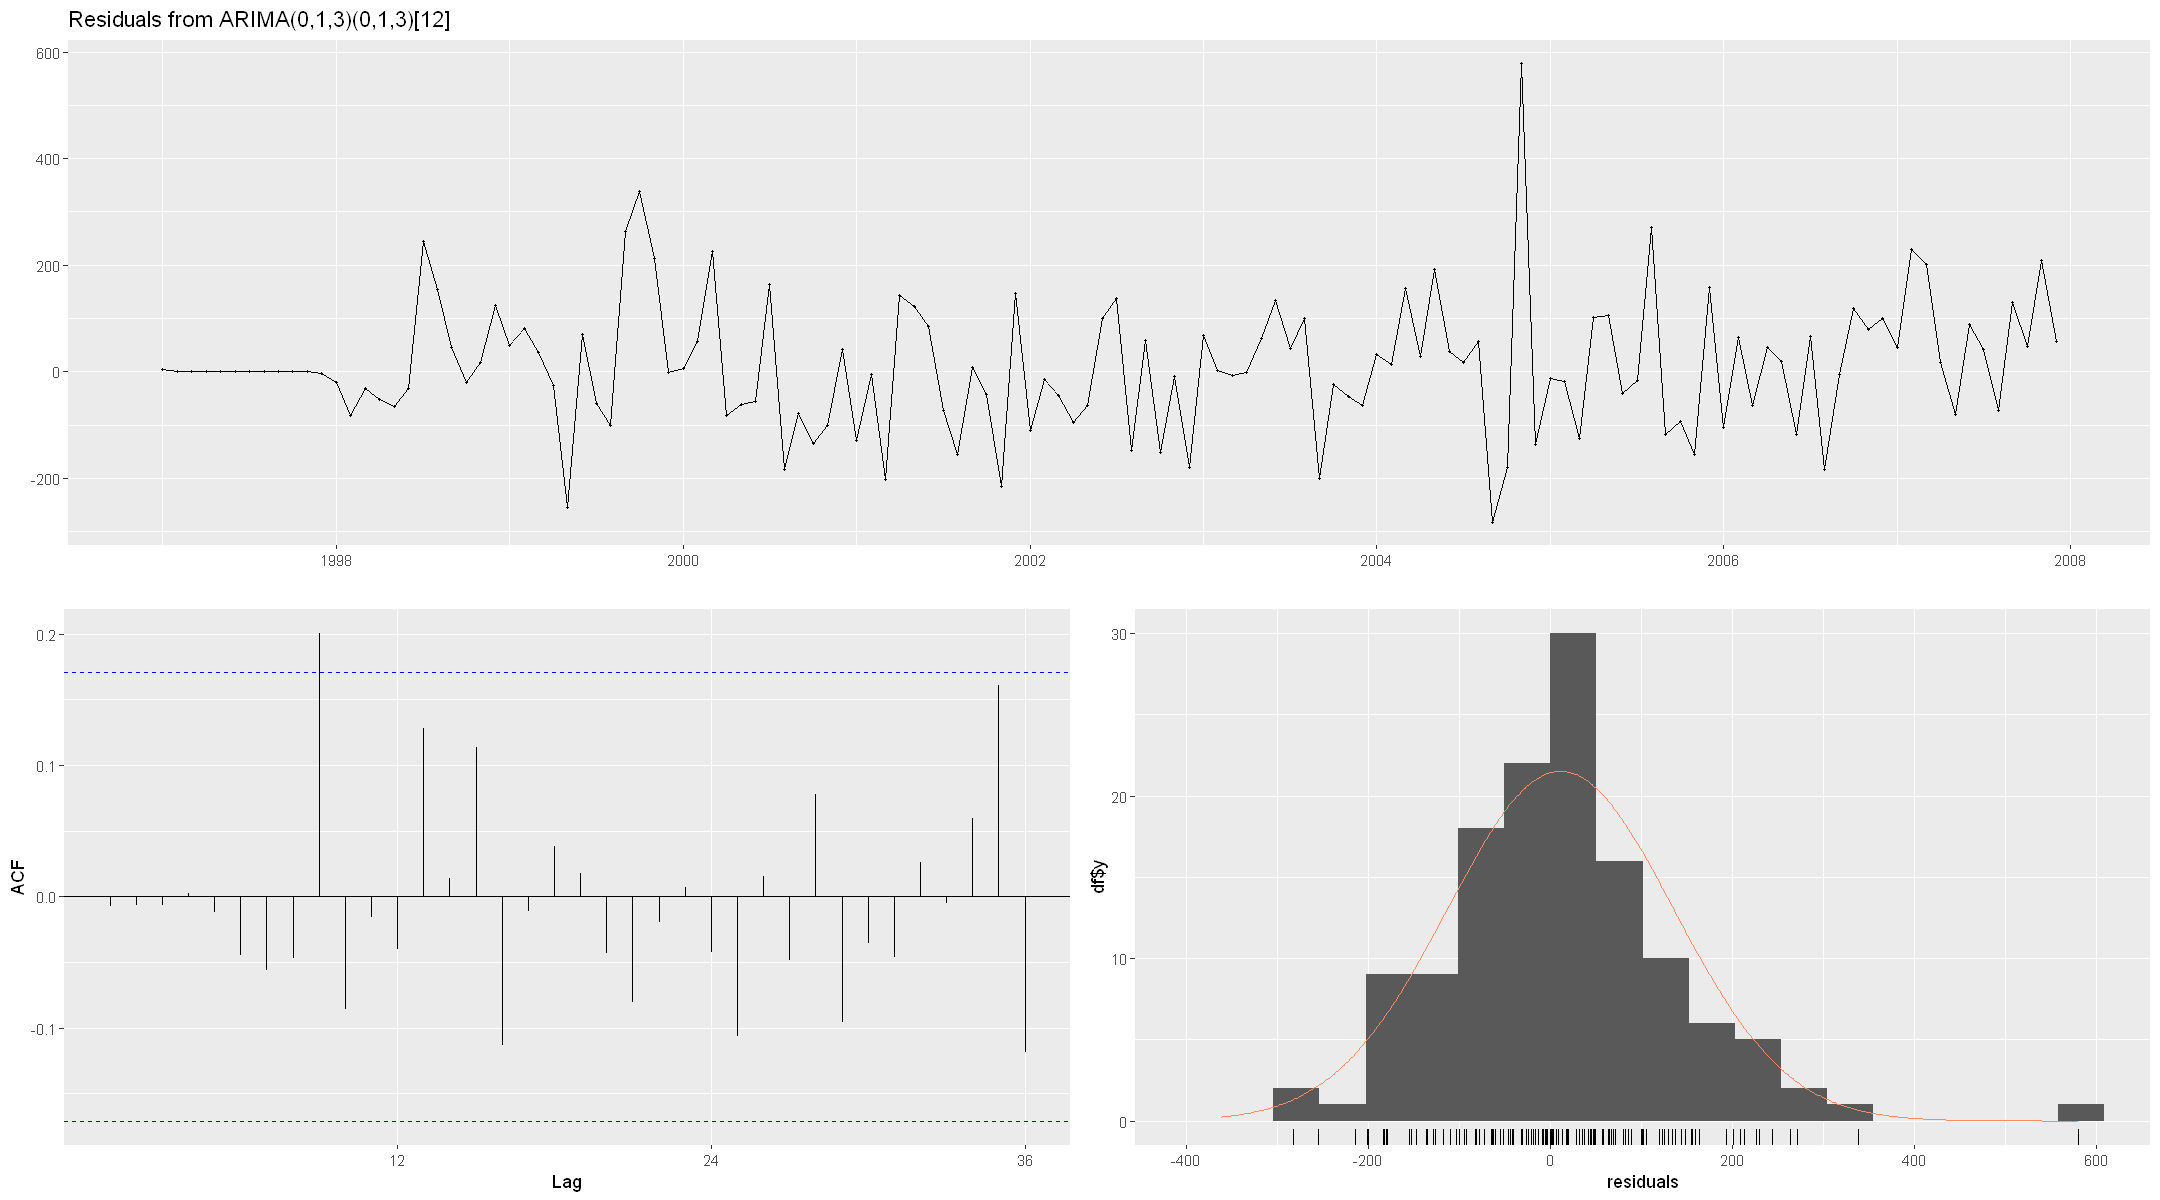

In [92]:
# b) Use the checkresiduals() function. 
#Which properties of residuals have been met or not met according to these plots? (2 marks)
checkresiduals(Arima_best)

- From the time plot, we see the residuals are randomly distributed and there is no trend, indicating no bias in the model
- In the ACF plot, we see only one significant lag (lag=9), what can occur due to random chance (we can expect 5% of the lags to be significant due to chance). Therefore, we don't have additional information we should be including in the model.
- Finaly, residuals are normally distributed around 0, with only one positive outlier

### c) Interpret the results of a portmanteau test for autocorrelations. (1 mark)
- Hypotheses: 
    - H0: the first h autocorrelations are not significantly different from a white noise process
    - HA: the first h autocorrelations are significantly different from a white noise process
- the number of lags tested: h= 24 lags (2m for seasonal data) 
- the test statistic: Q* = 16.543
- p-value: 0.5547
- decision: fail to reject the null hypothesis
- concluding sentence: we failed to reject that there are autocorrelations different from white noise

----

<div class="alert alert-block alert-warning">
<a id="Comparison"></a>

# Comparison of models (200 words max.) (2 marks)  

Compare your exponential smoothing/ETS model, your ARIMA model, and the basic methods. Which one is your best forecasting method (this will be your final model that is used in the next two sections)? Explain using support from previous questions as well as by creating a plot to compare the forecasts for the test set for the different methods.  
<div>


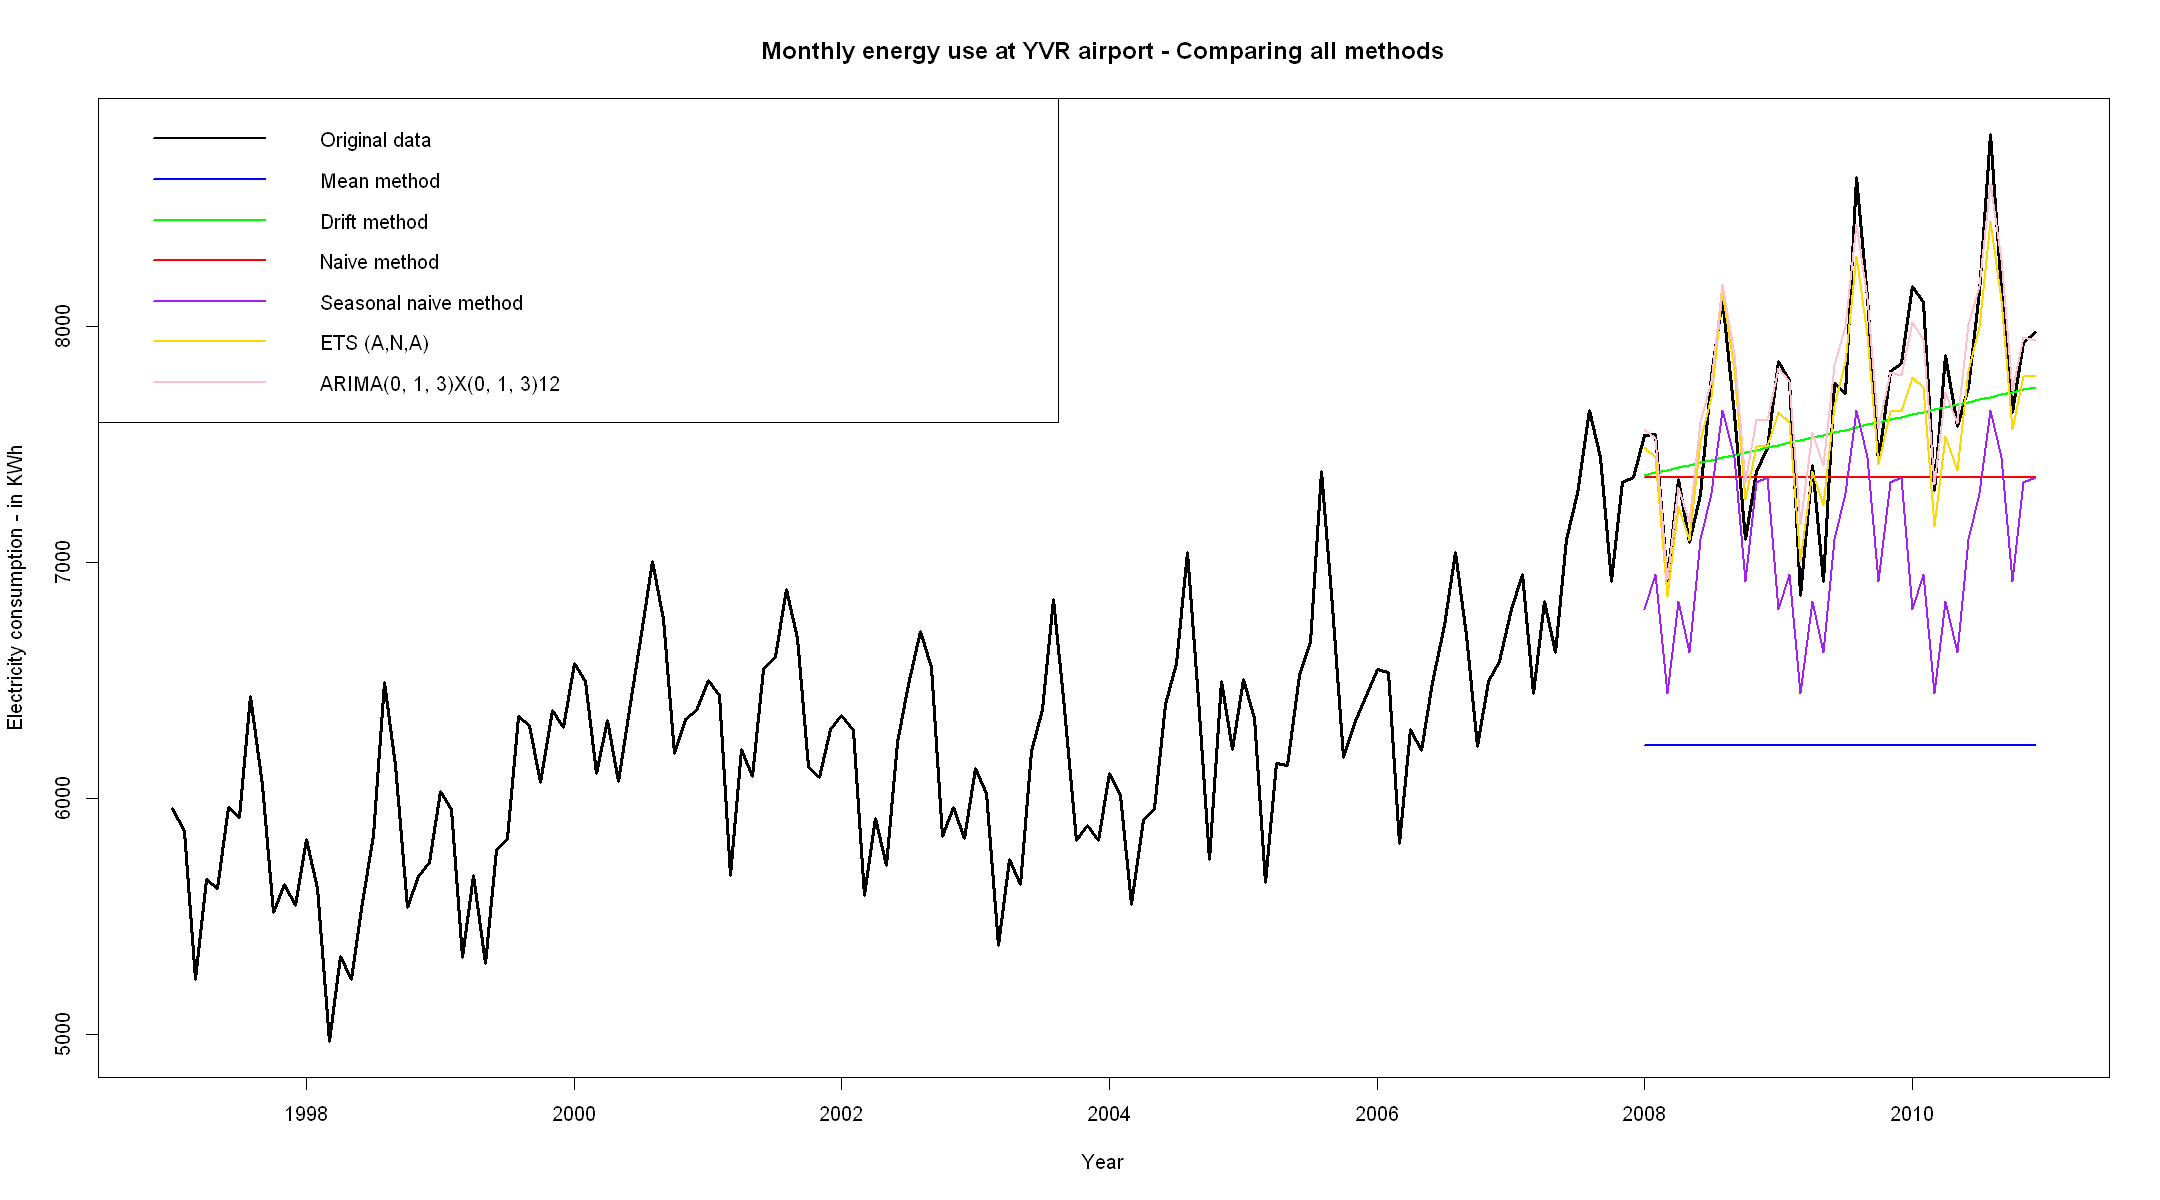

In [38]:
plot(YVR_energy
    ,main = "Monthly energy use at YVR airport - Comparing all methods"
    ,xlab="Year"
    ,ylab="Electricity consumption - in KWh"
    ,lwd = 3)

lines(YVR_energy.fit_mean$mean,col='blue',lwd=2)
lines(YVR_energy.fit_drift$mean,col='green',lwd=2)
lines(YVR_energy.fit_naive$mean,col='red',lwd=2)
lines(YVR_energy.fit_snaive$mean,col='purple',lwd=2)
lines(YVR.hwa1$mean, col="gold", lwd=2)
lines(YVR_energy.fit_arima$mean,col='pink',lwd=2)

legend("topleft"
       ,lty=1, lwd=2
       ,col=c('black','blue','green','red','purple','gold','pink')
       ,legend=c("Original data","Mean method","Drift method","Naive method","Seasonal naive method",'ETS (A,N,A)','ARIMA(0, 1, 3)X(0, 1, 3)12'))

In [39]:
method <- c("Mean method","Drift method","Naive method","Seasonal naive method","ETS(AAA)","ARIMA(0, 1, 3)X(0, 1, 3)12")
acc <-cbind(method, rbind(round(accuracy(YVR_energy.fit_mean, YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(YVR_energy.fit_drift, YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(YVR_energy.fit_naive, YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(YVR_energy.fit_snaive, YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(forecast(YVR.hwa1, 36), YVR_energy.test)[2,c(2,3,5,6)],1)
                    ,round(accuracy(YVR_energy.fit_arima, YVR_energy.test)[2,c(2,3,5,6)],1)))

acc

method,RMSE,MAE,MAPE,MASE
Mean method,1528.5,1463.8,18.8,5.5
Drift method,416,328.5,4.2,1.2
Naive method,550.1,443.2,5.6,1.7
Seasonal naive method,698.7,626.8,8,2.4
ETS(AAA),189,155.9,2,0.6
"ARIMA(0, 1, 3)X(0, 1, 3)12",167.8,122.1,1.6,0.5


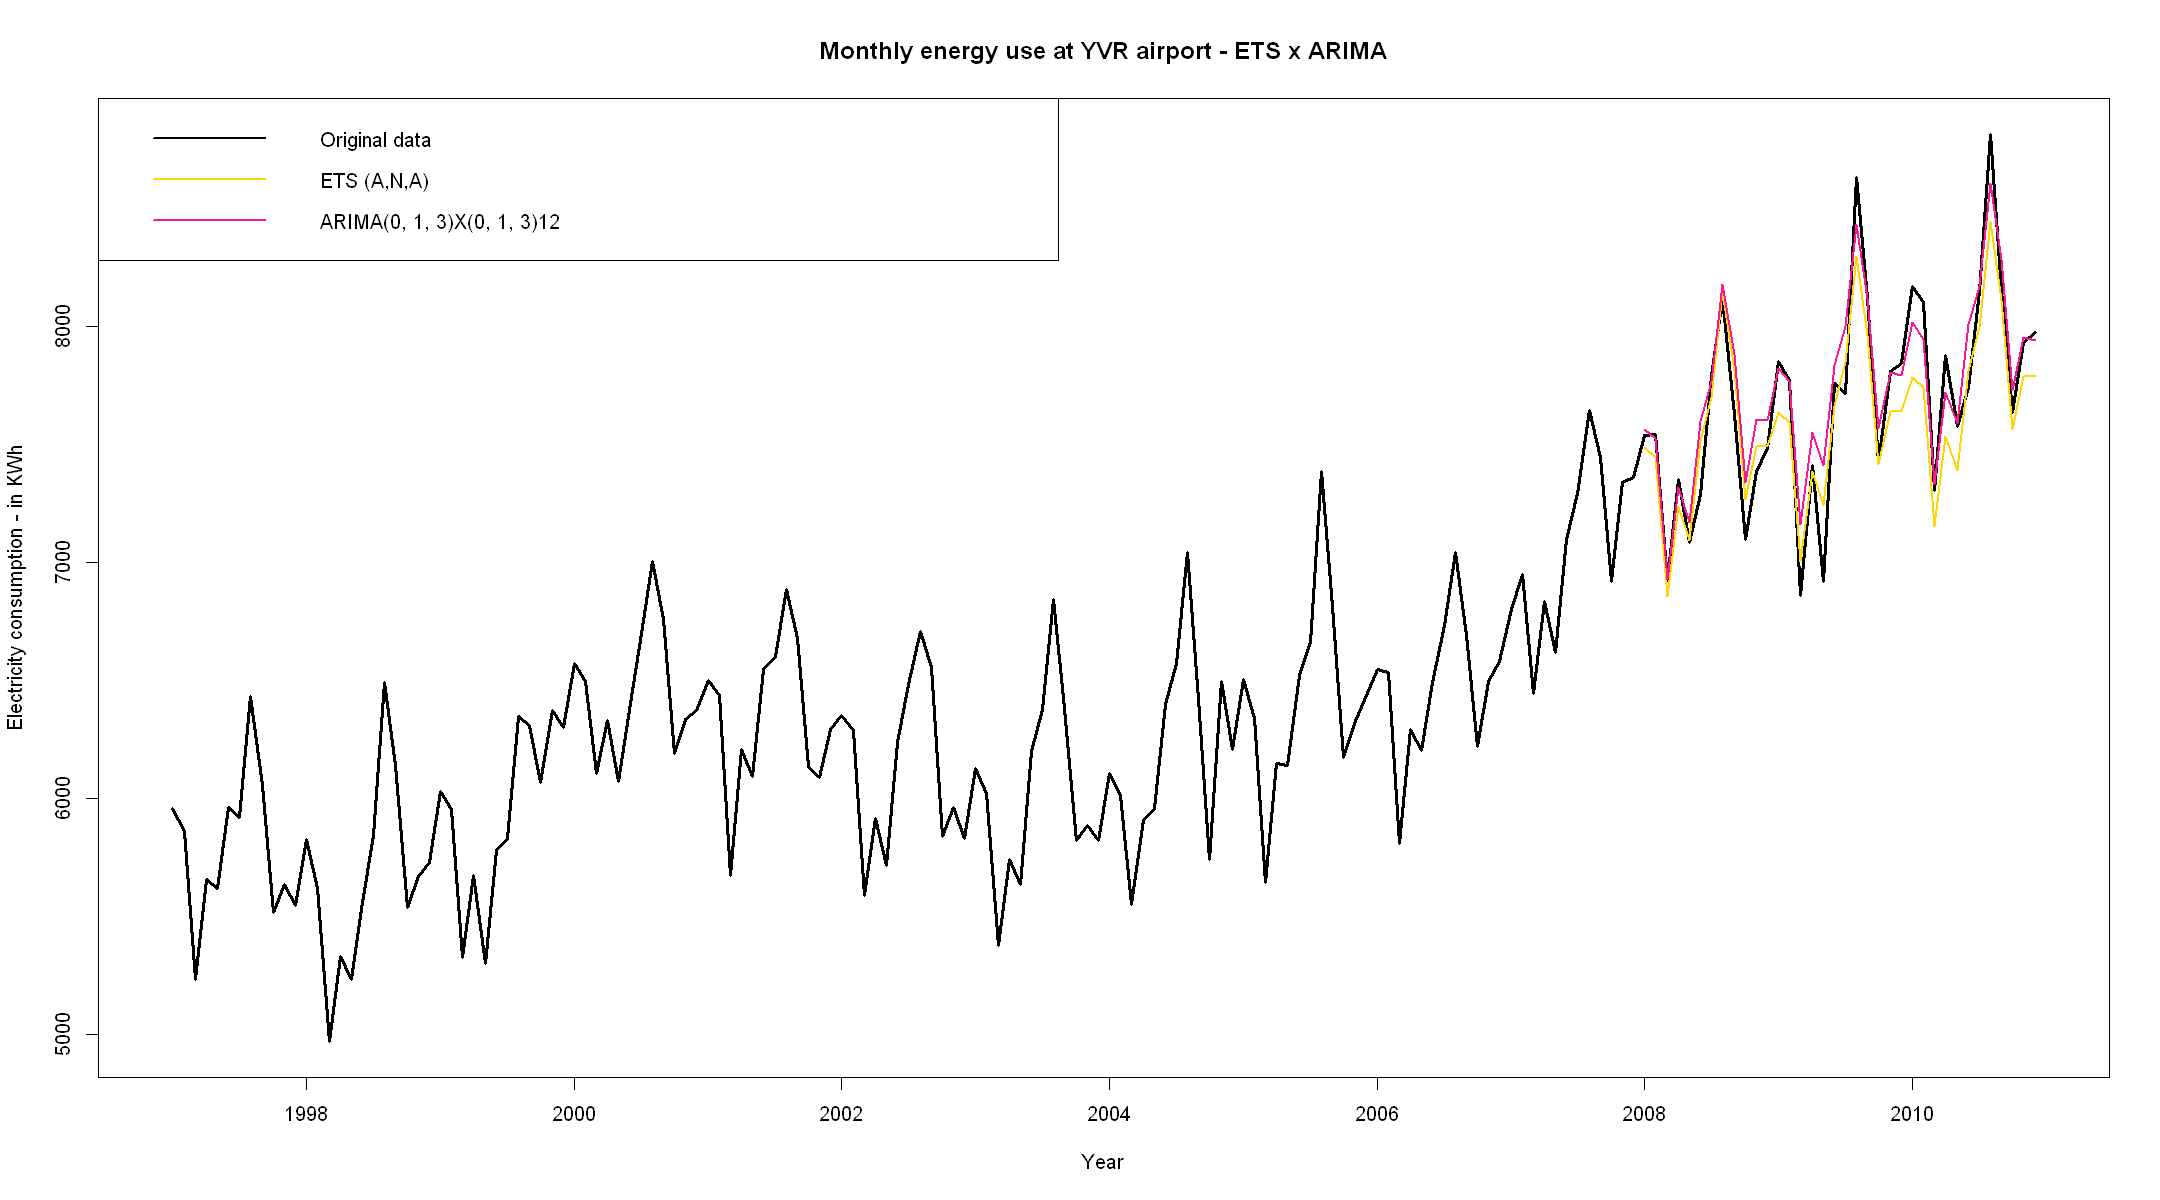

In [40]:
#We see the accuracy metrics are significantly better for ETS and ARIMA models, so we focus our plot with these 2 methods
plot(YVR_energy
    ,main = "Monthly energy use at YVR airport - ETS x ARIMA"
    ,xlab="Year"
    ,ylab="Electricity consumption - in KWh"
    ,lwd = 3)

lines(YVR.hwa1$mean, col="gold", lwd=2)
lines(YVR_energy.fit_arima$mean,col='deeppink',lwd=2)

legend("topleft"
       ,lty=1, lwd=2
       ,col=c('black','gold','deeppink')
       ,legend=c("Original data",'ETS (A,N,A)','ARIMA(0, 1, 3)X(0, 1, 3)12'))

<div class="alert alert-block alert-info"> 
<a id="Forecasts"></a>   
    
# Forecasts (1.25 marks)

Calculate the point forecasts using your final model for the next three years (January 2011 through December 2013).

Plot the entire dataset with the forecasts from your best forecasting method, including prediction intervals.
</div>

In [41]:
forecasting_h <- 36

best_model <- Arima(YVR_energy, order=c(0, 1, 3), seasonal=c(0, 1, 3))
best_model

final_forecast <-forecast(best_model,forecasting_h)
final_forecast

Series: YVR_energy 
ARIMA(0,1,3)(0,1,3)[12] 

Coefficients:
          ma1     ma2      ma3     sma1     sma2     sma3
      -0.3463  0.0420  -0.0819  -0.7480  -0.0249  -0.1217
s.e.   0.0814  0.0858   0.0835   0.1256   0.0967   0.1138

sigma^2 = 21671:  log likelihood = -998.81
AIC=2011.62   AICc=2012.38   BIC=2032.93

         Point Forecast    Lo 80     Hi 80    Lo 95     Hi 95
Jan 2011       8246.273 8056.032  8436.515 7955.324  8537.223
Feb 2011       8172.627 7945.426  8399.827 7825.154  8520.100
Mar 2011       7452.200 7189.340  7715.060 7050.190  7854.210
Apr 2011       7923.760 7636.183  8211.337 7483.949  8363.571
May 2011       7684.733 7374.402  7995.065 7210.122  8159.345
Jun 2011       8103.630 7772.102  8435.158 7596.602  8610.659
Jul 2011       8304.185 7952.737  8655.634 7766.691  8841.679
Aug 2011       8883.702 8513.403  9254.000 8317.379  9450.025
Sep 2011       8428.414 8040.179  8816.648 7834.660  9022.167
Oct 2011       7858.604 7453.226  8263.982 7238.632  8478.576
Nov 2011       8132.765 7710.929  8554.602 7487.622  8777.908
Dec 2011       8146.528 7708.857  8584.199 7477.168  8815.888
Jan 2012       8402.407 7933.703  8871.112 7685.585  9119.229
Feb 2012       8337.081 7845.128  8829.033 7584.704  9089.457
Mar 2012       7657.700 7142.930  8172.471 6870.426  8444.975
Apr 2012

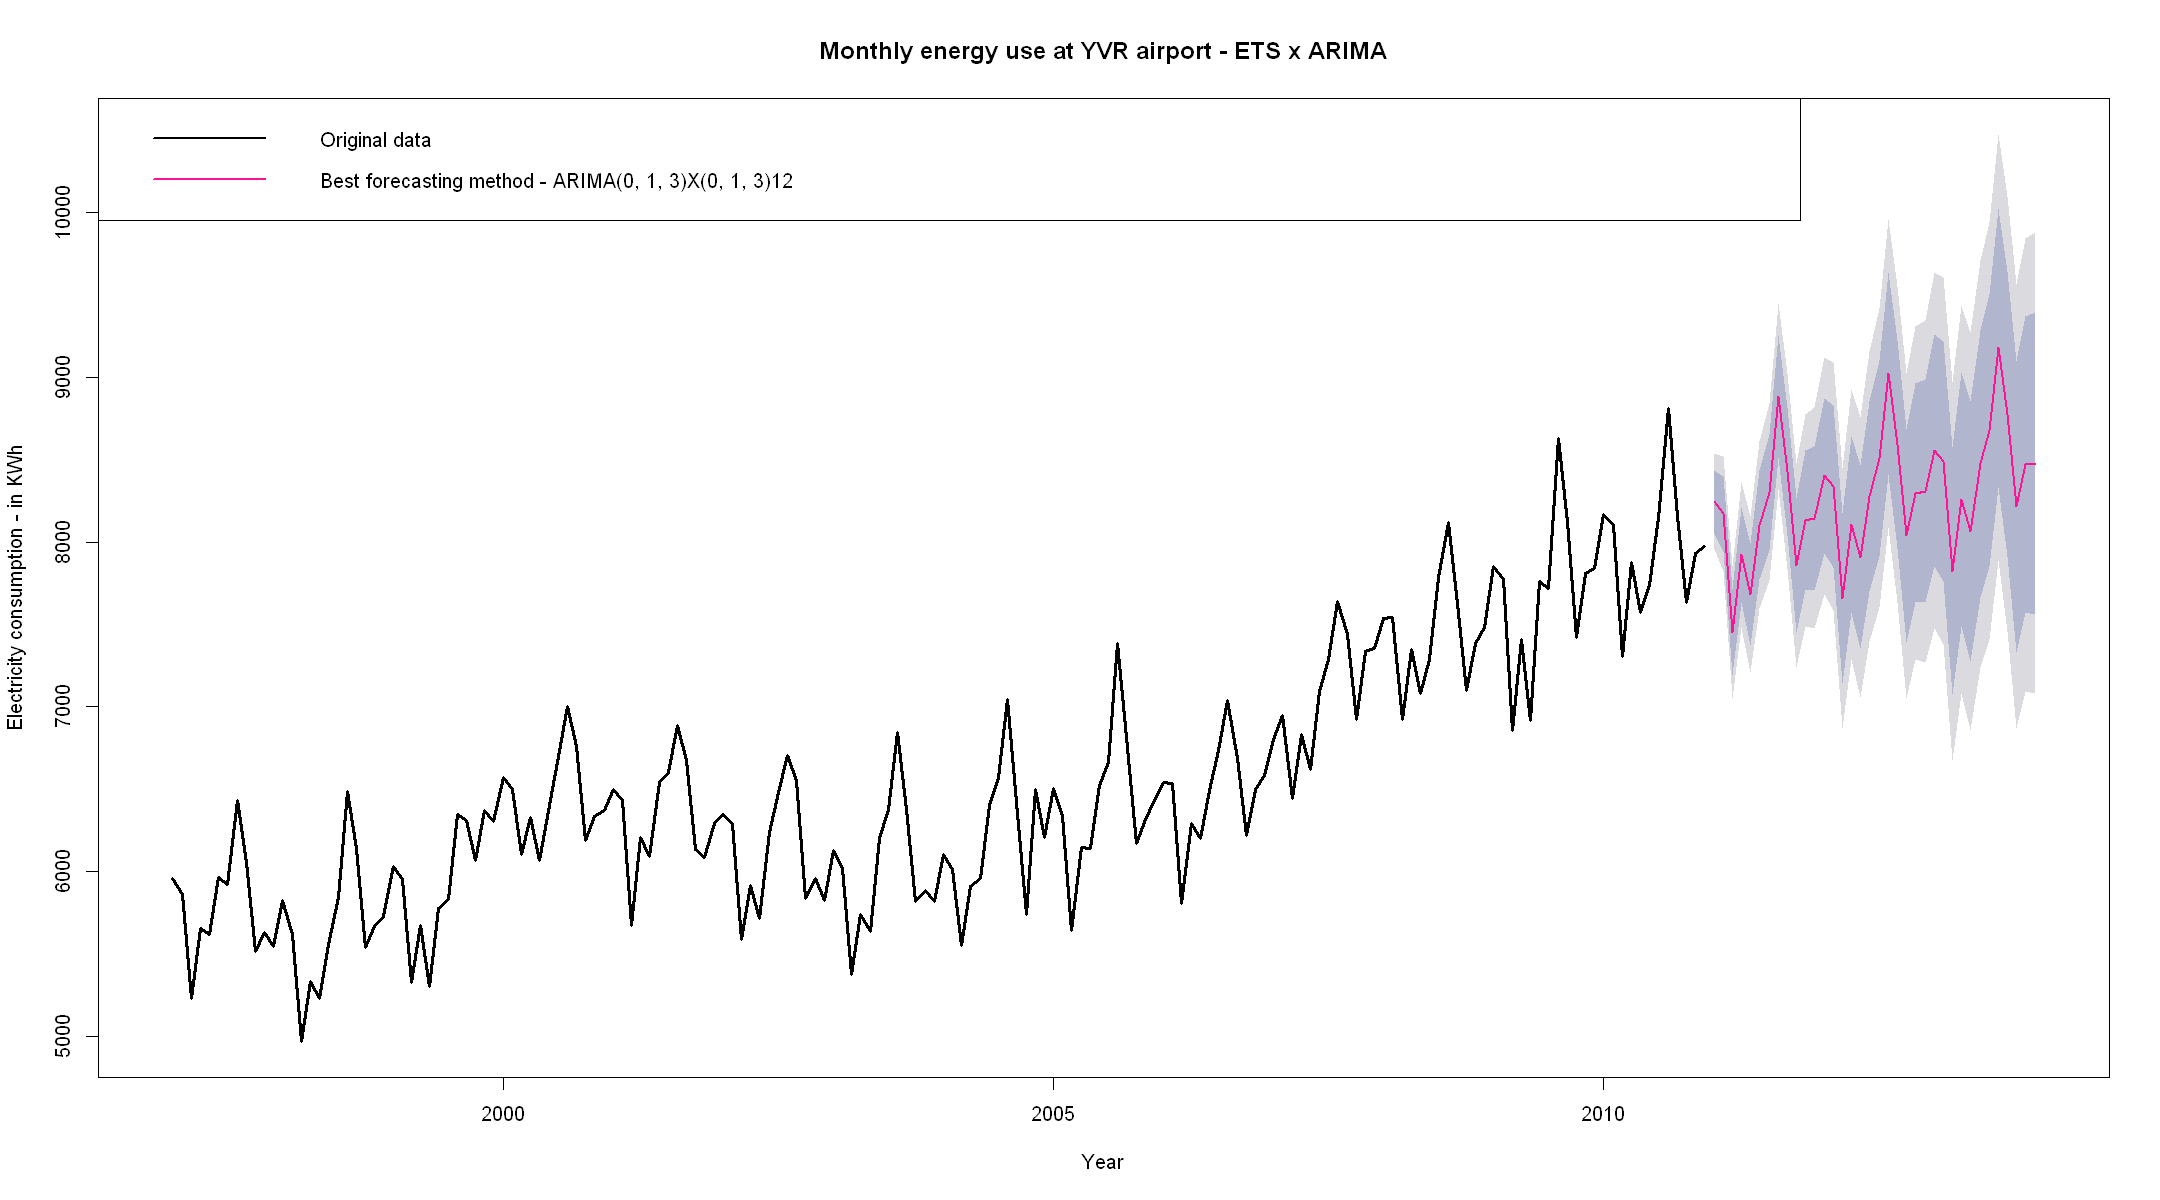

In [42]:
plot(final_forecast
    ,main = "Monthly energy use at YVR airport - ETS x ARIMA"
    ,xlab="Year"
    ,ylab="Electricity consumption - in KWh"
    ,lwd = 3
    ,fcol = "deeppink")

legend("topleft"
       ,lty=1, lwd=2
       ,col=c('black','deeppink')
       ,legend=c("Original data",'Best forecasting method - ARIMA(0, 1, 3)X(0, 1, 3)12'))

<div class="alert alert-block alert-warning">
<a id="Discussion"></a>

# Discussion (300 words max.) (3 marks)

Discuss three limitations of this final model, and recommendations to address these limitations. (300 words max.)
<div>


<div class="alert alert-block alert-success">
<a id="Explanatory"></a>

# Explanatory model (200 words max.) (2 marks)

Describe a possible explanatory model to try (you do not have to create this model). Explain the process required to be able to use this model to forecast.  
</div>

To create an Explanatory model, we need to identify factors that “cause” the pattern, identify the form of the relationship and use it forecast future values of the forecast variable. We need to assume that the forecast variable shows an explanatory relationship with one or more independent variables. A possible explanatory model to try is a multiple linear regression model. This model assumes that there is a linear relationship between a dependent variable and multiple independent variables. It can help explain how changes in the independent variables impact the dependent variable. To use this model for forecasting, we would need to follow a few steps:

Clean the data: Clean the data by removing any outliers, missing values, or errors.

Split the data into training and testing sets.

Build the model: Use the training set to fit the multiple linear regression model. This involves selecting the appropriate independent variables and determining the coefficients for each variable. We can follow the methods for choosing the right variables.

• Cross validation • AIC, AICc, BIC • Adjusted R2

Evaluate the model: Use the testing set to evaluate the accuracy of the model. Calculate metrics such as mean squared error or R-squared to determine how well the model fits the data.

Make forecasts: Once the model has been evaluated and found to be accurate, use it to make forecasts for the dependent variable based on the independent variables.

----

<div class="alert alert-block alert-danger">
<a id="AppendixA"></a>

# Appendix A:
# ETS models (1 mark)
</div>

In [43]:
accuracy(forecast(model_best, horizon), YVR_energy.test)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,12.73609,126.6517,98.09986,0.1709555,1.569775,0.3702114,-0.0144411,NA
Test set,291.09860,386.4068,315.93726,3.6655159,4.009293,1.1922911,0.6651536,0.7933645


---

<div class="alert alert-block alert-danger">
<a id="AppendixB"></a>

# Appendix B:
# ARIMA Models (1 mark)
</div>

In [44]:
Autoarima <- auto.arima(YVR_energy.training, stepwise=FALSE, approximation=FALSE)
Autoarima
accuracy(forecast(Autoarima,horizon), YVR_energy.test)

Series: YVR_energy.training 
ARIMA(1,1,0)(2,1,0)[12] 

Coefficients:
          ar1     sar1     sar2
      -0.2482  -0.4993  -0.2136
s.e.   0.0909   0.0937   0.1006

sigma^2 = 24330:  log likelihood = -769.95
AIC=1547.9   AICc=1548.25   BIC=1559.01

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.902709,146.2229,104.9458,0.1326502,1.668495,0.3960468,-0.008078189,NA
Test set,-459.577317,532.0309,459.5773,-5.9855995,5.985599,1.7343631,0.625382643,1.101258


In [45]:
#arima1: ARIMA(1, 1, 0)X(3, 1, 0)12
Arima1 <- Arima(YVR_energy.training, order=c(1, 1, 0), seasonal=c(3, 1, 0))
Arima1
accuracy(forecast(Arima1,horizon), YVR_energy.test)

Series: YVR_energy.training 
ARIMA(1,1,0)(3,1,0)[12] 

Coefficients:
          ar1     sar1     sar2     sar3
      -0.2034  -0.5587  -0.3767  -0.3518
s.e.   0.0539   0.0576   0.1103   0.0461

sigma^2 = 21659:  log likelihood = -764.79
AIC=1539.58   AICc=1540.11   BIC=1553.48

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,10.77114,137.3672,99.2031,0.1439112,1.577880,0.3743749,-0.004502078,NA
Test set,-466.56371,513.3184,466.5637,-6.0923826,6.092383,1.7607285,0.521129318,1.07345


In [46]:
#arima2: ARIMA(3, 1, 0)X(3, 1, 0)12
Arima2 <- Arima(YVR_energy.training, order=c(3, 1, 0), seasonal=c(3, 1, 0))
Arima2
accuracy(forecast(Arima2,horizon), YVR_energy.test)

Series: YVR_energy.training 
ARIMA(3,1,0)(3,1,0)[12] 

Coefficients:
          ar1      ar2      ar3     sar1     sar2     sar3
      -0.2022  -0.0013  -0.0453  -0.5423  -0.3708  -0.3501
s.e.   0.0936   0.0940   0.0981   0.0971   0.1055   0.1019

sigma^2 = 22037:  log likelihood = -764.68
AIC=1543.36   AICc=1544.37   BIC=1562.82

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,11.1273,137.3505,98.69848,0.1492133,1.569358,0.3724705,-0.008811497,NA
Test set,-466.0189,513.1719,466.01889,-6.0849849,6.084985,1.7586725,0.523981234,1.073125


In [47]:
#arima3: ARIMA(1, 1, 0)X(0, 1, 3)12
Arima3 <- Arima(YVR_energy.training, order=c(1, 1, 0), seasonal=c(0, 1, 3))
Arima3
accuracy(forecast(Arima3,horizon), YVR_energy.test)

Series: YVR_energy.training 
ARIMA(1,1,0)(0,1,3)[12] 

Coefficients:
          ar1     sma1     sma2     sma3
      -0.2083  -0.8218  -0.1015  -0.0767
s.e.   0.0904   0.1730   0.1095   0.1066

sigma^2 = 17753:  log likelihood = -761.13
AIC=1532.26   AICc=1532.79   BIC=1546.16

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,9.699166,124.3638,90.08873,0.1299046,1.434597,0.3399789,-0.007593149,NA
Test set,-92.185437,179.8297,132.79786,-1.2774276,1.764788,0.5011555,0.160769538,0.3821545


In [48]:
#arima4: ARIMA(3, 1, 0)X(0, 1, 3)12
Arima4 <- Arima(YVR_energy.training, order=c(3, 1, 0), seasonal=c(0, 1, 3))
Arima4
accuracy(forecast(Arima4,horizon), YVR_energy.test)

Series: YVR_energy.training 
ARIMA(3,1,0)(0,1,3)[12] 

Coefficients:
          ar1      ar2      ar3     sma1     sma2     sma3
      -0.2126  -0.0201  -0.0708  -0.8000  -0.1230  -0.0770
s.e.   0.0922   0.0940   0.0963   0.1724   0.1141   0.1086

sigma^2 = 18028:  log likelihood = -760.86
AIC=1535.72   AICc=1536.72   BIC=1555.17

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,10.44904,124.2296,89.90845,0.1408939,1.43145,0.3392985,-0.008326758,NA
Test set,-85.50776,177.0501,129.95088,-1.1905129,1.72588,0.4904115,0.165079076,0.3762899


In [49]:
#arima5: ARIMA(0, 1, 1)X(3, 1, 0)12
Arima5 <- Arima(YVR_energy.training, order=c(0, 1, 1), seasonal=c(3, 1, 0))
Arima5
accuracy(forecast(Arima5,horizon), YVR_energy.test)

Series: YVR_energy.training 
ARIMA(0,1,1)(3,1,0)[12] 

Coefficients:
          ma1     sar1     sar2     sar3
      -0.1992  -0.5591  -0.3756  -0.3519
s.e.   0.0912   0.0908   0.1054   0.1018

sigma^2 = 21689:  log likelihood = -764.87
AIC=1539.75   AICc=1540.28   BIC=1553.64

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,11.1205,137.4619,99.6306,0.1487127,1.585054,0.3759882,-0.01124309,NA
Test set,-453.5369,500.7822,453.5369,-5.9234106,5.923411,1.7115678,0.51412567,1.047465


In [50]:
#arima6: ARIMA(0, 1, 3)X(3, 1, 0)12
Arima6 <- Arima(YVR_energy.training, order=c(0, 1, 3), seasonal=c(3, 1, 0))
Arima6
accuracy(forecast(Arima6,horizon), YVR_energy.test)

Series: YVR_energy.training 
ARIMA(0,1,3)(3,1,0)[12] 

Coefficients:
          ma1     ma2      ma3     sar1     sar2     sar3
      -0.2110  0.0374  -0.0813  -0.5382  -0.3713  -0.3523
s.e.   0.0941  0.0985   0.0993   0.0948   0.1047   0.1013

sigma^2 = 21967:  log likelihood = -764.51
AIC=1543.02   AICc=1544.03   BIC=1562.48

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,11.84718,137.1305,98.26453,0.1599773,1.562014,0.3708329,-0.003269919,NA
Test set,-439.08893,486.4464,439.08893,-5.7359037,5.735904,1.6570436,0.506048850,1.017817


In [51]:
#arima7: ARIMA(0, 1, 1)X(0, 1, 3)12
Arima7 <- Arima(YVR_energy.training, order=c(0, 1, 1), seasonal=c(0, 1, 3))
Arima7
accuracy(forecast(Arima7,horizon), YVR_energy.test)

Series: YVR_energy.training 
ARIMA(0,1,1)(0,1,3)[12] 

Coefficients:
          ma1     sma1     sma2     sma3
      -0.2108  -0.8252  -0.0985  -0.0762
s.e.   0.0910   0.1721   0.1095   0.1072

sigma^2 = 17746:  log likelihood = -761.13
AIC=1532.27   AICc=1532.8   BIC=1546.17

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,10.11589,124.3413,90.54206,0.135486,1.441943,0.3416896,-0.008447282,NA
Test set,-77.20118,173.1076,126.41549,-1.082724,1.676984,0.4770696,0.166007602,0.3678171


In [52]:
#arima8: ARIMA(0, 1, 3)X(0, 1, 3)12
Arima8 <- Arima(YVR_energy.training, order=c(0, 1, 3), seasonal=c(0, 1, 3))
Arima8
accuracy(forecast(Arima8,horizon), YVR_energy.test)

Series: YVR_energy.training 
ARIMA(0,1,3)(0,1,3)[12] 

Coefficients:
          ma1     ma2      ma3     sma1     sma2     sma3
      -0.2145  0.0231  -0.0805  -0.8045  -0.1209  -0.0746
s.e.   0.0921  0.0941   0.0974   0.1728   0.1123   0.1086

sigma^2 = 17996:  log likelihood = -760.8
AIC=1535.6   AICc=1536.61   BIC=1555.05

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1,Theil's U
Training set,10.94123,124.1191,90.1119,0.1484034,1.434007,0.3400663,-0.007552921,NA
Test set,-62.53939,167.7606,122.1070,-0.8923171,1.616042,0.4608102,0.173153688,0.3562548


In [53]:
#Selecting best model

models <- list(Arima1, Arima2, Arima3, Arima4, Arima5, Arima6, Arima7, Arima8)

for (i in 1:length(models)) {
    current_model <- models[[i]] # Access the current model using the index
    fit <- forecast(current_model,horizon)
    acc <- accuracy(fit, YVR_energy.test)
    print(paste("model",i,'=',current_model,", RMSE =",round(acc[2,2],1),", MASE =",round(acc[2,6],3)))
}

[1] "model 1 = ARIMA(1,1,0)(3,1,0)[12] , RMSE = 513.3 , MASE = 1.761"
[1] "model 2 = ARIMA(3,1,0)(3,1,0)[12] , RMSE = 513.2 , MASE = 1.759"
[1] "model 3 = ARIMA(1,1,0)(0,1,3)[12] , RMSE = 179.8 , MASE = 0.501"
[1] "model 4 = ARIMA(3,1,0)(0,1,3)[12] , RMSE = 177.1 , MASE = 0.49"
[1] "model 5 = ARIMA(0,1,1)(3,1,0)[12] , RMSE = 500.8 , MASE = 1.712"
[1] "model 6 = ARIMA(0,1,3)(3,1,0)[12] , RMSE = 486.4 , MASE = 1.657"
[1] "model 7 = ARIMA(0,1,1)(0,1,3)[12] , RMSE = 173.1 , MASE = 0.477"
[1] "model 8 = ARIMA(0,1,3)(0,1,3)[12] , RMSE = 167.8 , MASE = 0.461"
